<a href="https://colab.research.google.com/github/irash0005/-13code/blob/main/ML%20Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#подключение к гугл диску
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB


import shap

In [4]:
folder='/content/gdrive/My Drive/dha'

In [5]:
df = pd.read_excel('/content/gdrive/MyDrive/dha/dexa.xlsx')


**2.1. Обработка набора данных**

In [5]:
display(df)

,kod_health,vozrast,rost,ves,BMI,T1/3,Tneck,Ttot_femur,TL1-4
0,1,57,154,78,32.889189,-1.9,-0.9,0.5,-1.1
1,1,39,160,63,24.609375,-0.6,-0.6,0.0,-0.4
2,1,55,166,68,24.677021,-1.0,-1.6,-0.6,-2.2
3,1,67,163,66,24.840980,-3.5,-1.7,-1.5,-3.3
4,1,57,164,47,17.474717,-1.3,-1.7,0.2,-0.4
...,...,...,...,...,...,...,...,...,...
403,0,61,153,75,32.038959,-2.4,-2.3,-2.5,-2.5
404,0,57,153,74,31.611773,-0.5,-1.2,-1.2,-1.7
405,0,63,160,60,23.437500,-2.7,-2.4,-3.1,-3.6
406,0,67,161,89,34.335095,-1.7,-1.4,-1.9,-1.0


In [6]:
df.head()

,kod_health,vozrast,rost,ves,BMI,T1/3,Tneck,Ttot_femur,TL1-4
0,1,57,154,78,32.889189,-1.9,-0.9,0.5,-1.1
1,1,39,160,63,24.609375,-0.6,-0.6,0.0,-0.4
2,1,55,166,68,24.677021,-1.0,-1.6,-0.6,-2.2
3,1,67,163,66,24.840980,-3.5,-1.7,-1.5,-3.3
4,1,57,164,47,17.474717,-1.3,-1.7,0.2,-0.4


In [7]:
df.columns

Index(['kod_health', 'vozrast', 'rost', 'ves', 'BMI', 'T1/3', 'Tneck',
       'Ttot_femur', 'TL1-4'],
      dtype='object')

In [8]:
df.shape

(408, 9)

In [9]:
df.describe()

,kod_health,vozrast,rost,ves,BMI,T1/3,Tneck,Ttot_femur,TL1-4
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,0.816176,59.911765,158.578431,73.441176,29.257307,-1.385784,-0.976961,-0.449755,-0.873039
std,0.387816,11.951255,6.448719,14.840560,5.915353,1.406843,1.193104,1.356176,1.530528
min,0.000000,22.000000,141.000000,28.000000,12.957564,-6.800000,-4.500000,-6.500000,-5.000000
25%,1.000000,53.000000,155.000000,64.000000,24.876912,-2.300000,-1.800000,-1.300000,-1.900000
50%,1.000000,61.000000,158.000000,72.000000,28.841532,-1.250000,-1.150000,-0.400000,-1.000000
75%,1.000000,67.000000,163.000000,82.000000,32.821200,-0.400000,-0.200000,0.400000,0.000000
max,1.000000,90.000000,180.000000,146.000000,54.951259,2.000000,2.600000,4.300000,5.200000


In [10]:
df.dtypes

,0
kod_health,int64
vozrast,int64
rost,int64
ves,int64
BMI,float64
T1/3,float64
Tneck,float64
Ttot_femur,float64
TL1-4,float64


In [11]:
print(df.isnull().sum())

kod_health    0
vozrast       0
rost          0
ves           0
BMI           0
T1/3          0
Tneck         0
Ttot_femur    0
TL1-4         0
dtype: int64


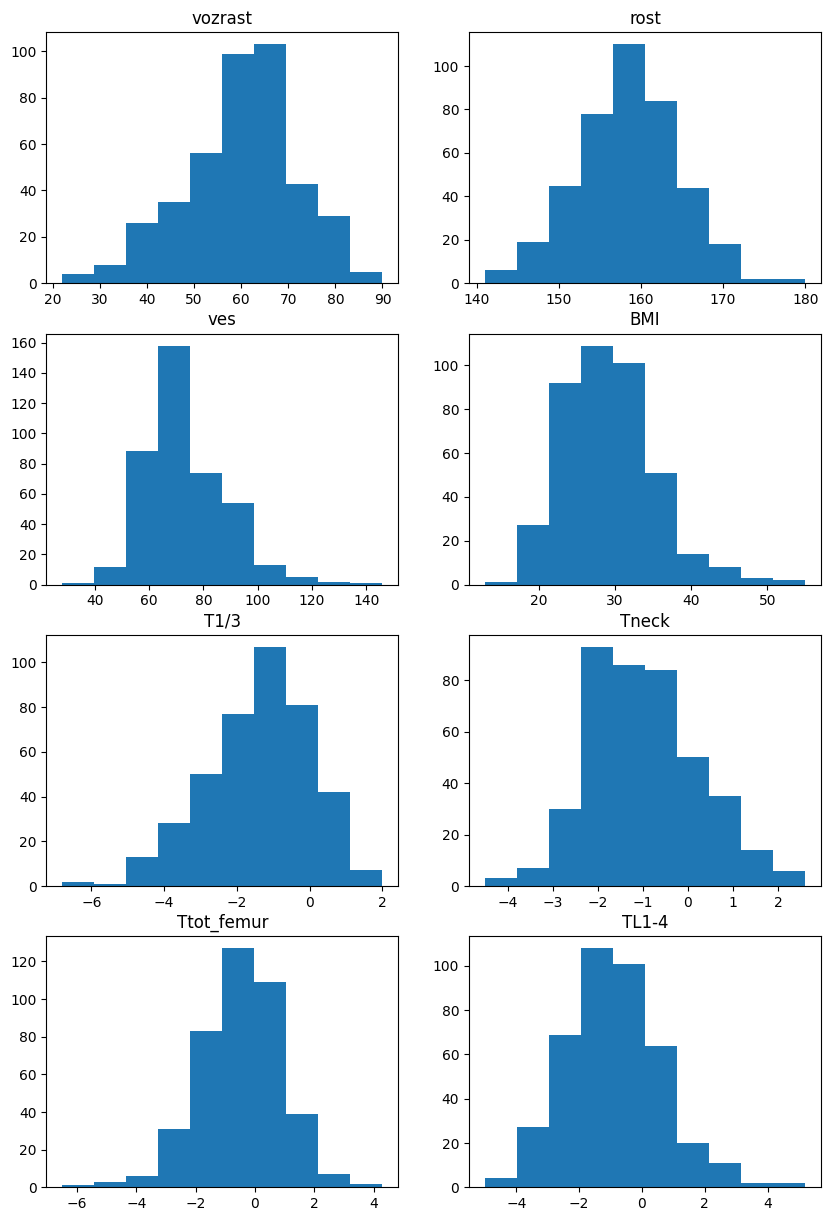

In [12]:
#построениие гистограмм до удаления выбросов
fig, ax = plt.subplots(4,2, figsize=(10,15))

ax[0, 0].hist(df['vozrast'])
ax[0, 0].set_title('vozrast')

ax[0, 1].hist(df['rost'])
ax[0, 1].set_title('rost')

ax[1, 0].hist(df['ves'])
ax[1, 0].set_title('ves')

ax[1, 1].hist(df['BMI'])
ax[1, 1].set_title('BMI')

ax[2, 0].hist(df['T1/3'])
ax[2, 0].set_title('T1/3')

ax[2, 1].hist(df['Tneck'])
ax[2, 1].set_title('Tneck')

ax[3, 0].hist(df['Ttot_femur'])
ax[3, 0].set_title('Ttot_femur')

ax[3, 1].hist(df['TL1-4'])
ax[3, 1].set_title('TL1-4')


plt.show()

In [13]:
#функция для обработки выбросов
def outlier_less(df,col):
    Q1 = np.quantile(df[[col]], 0.25)
    Q3 = np.quantile(df[[col]], 0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    higher = Q3 + 1.5*IQR

    df_outlier_less = df[df[col] >= lower]
    #проверка на наличие вхних выбросов
    df_outlier_less = df_outlier_less[df_outlier_less[col] <= higher]
    return (df_outlier_less)

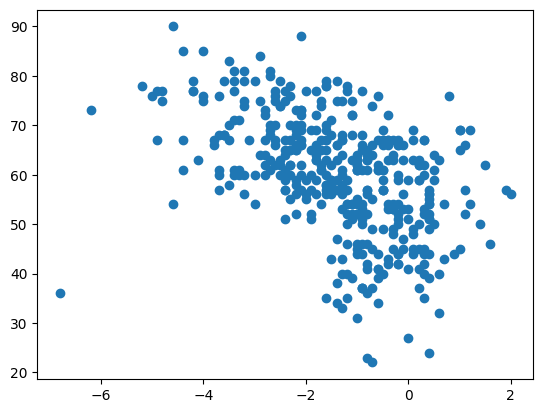

In [14]:
vozrast_list = list(df['vozrast'])
predolechie_list = list(df['T1/3'])
plt.scatter(predolechie_list,vozrast_list)#x y
plt.show()

In [15]:
df.tail()

,kod_health,vozrast,rost,ves,BMI,T1/3,Tneck,Ttot_femur,TL1-4
403,0,61,153,75,32.038959,-2.4,-2.3,-2.5,-2.5
404,0,57,153,74,31.611773,-0.5,-1.2,-1.2,-1.7
405,0,63,160,60,23.437500,-2.7,-2.4,-3.1,-3.6
406,0,67,161,89,34.335095,-1.7,-1.4,-1.9,-1.0
407,0,58,161,68,26.233556,-2.2,-1.9,-2.3,-3.0


In [16]:
import seaborn as sns

,count
T1/3,
-1.0,16
-1.6,15
-0.9,15
-0.8,14
-1.3,14
...,...
-3.1,1
-6.8,1
1.4,1


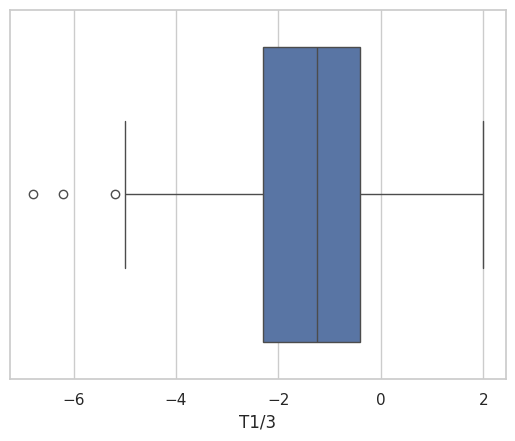

In [17]:
#диаграмма размаха до удаления выбросов
sns.set(style='whitegrid')
sns.boxplot(df, x='T1/3')
df['T1/3'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 0 to 407
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kod_health  405 non-null    int64  
 1   vozrast     405 non-null    int64  
 2   rost        405 non-null    int64  
 3   ves         405 non-null    int64  
 4   BMI         405 non-null    float64
 5   T1/3        405 non-null    float64
 6   Tneck       405 non-null    float64
 7   Ttot_femur  405 non-null    float64
 8   TL1-4       405 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 31.6 KB


,count
T1/3,
-1.0,16
-0.9,15
-1.6,15
-0.8,14
-1.3,14
...,...
1.9,1
-3.1,1
1.4,1


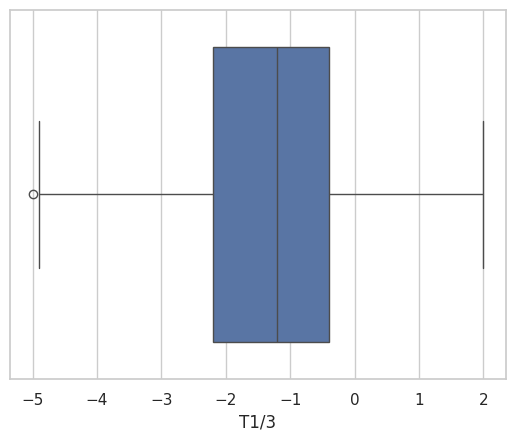

In [18]:
#диаграмма размаха после удаления выбросов
df = outlier_less(df,'T1/3')
df.info()
sns.set(style='whitegrid')
sns.boxplot(df, x='T1/3')
df['T1/3'].value_counts()

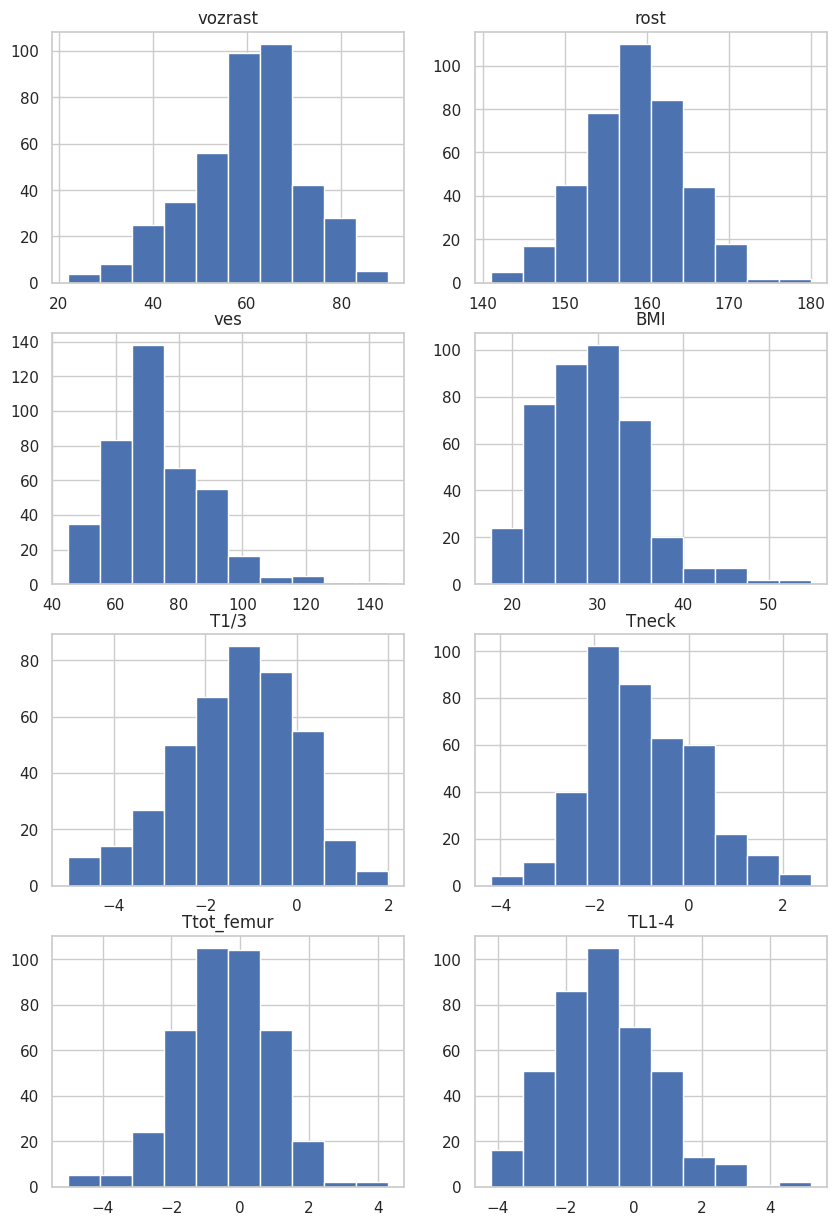

In [19]:
#построениие гистограмм после удаления выбросов
fig, ax = plt.subplots(4,2, figsize=(10,15))

ax[0, 0].hist(df['vozrast'])
ax[0, 0].set_title('vozrast')

ax[0, 1].hist(df['rost'])
ax[0, 1].set_title('rost')

ax[1, 0].hist(df['ves'])
ax[1, 0].set_title('ves')

ax[1, 1].hist(df['BMI'])
ax[1, 1].set_title('BMI')

ax[2, 0].hist(df['T1/3'])
ax[2, 0].set_title('T1/3')

ax[2, 1].hist(df['Tneck'])
ax[2, 1].set_title('Tneck')

ax[3, 0].hist(df['Ttot_femur'])
ax[3, 0].set_title('Ttot_femur')

ax[3, 1].hist(df['TL1-4'])
ax[3, 1].set_title('TL1-4')


plt.show()

<Axes: >

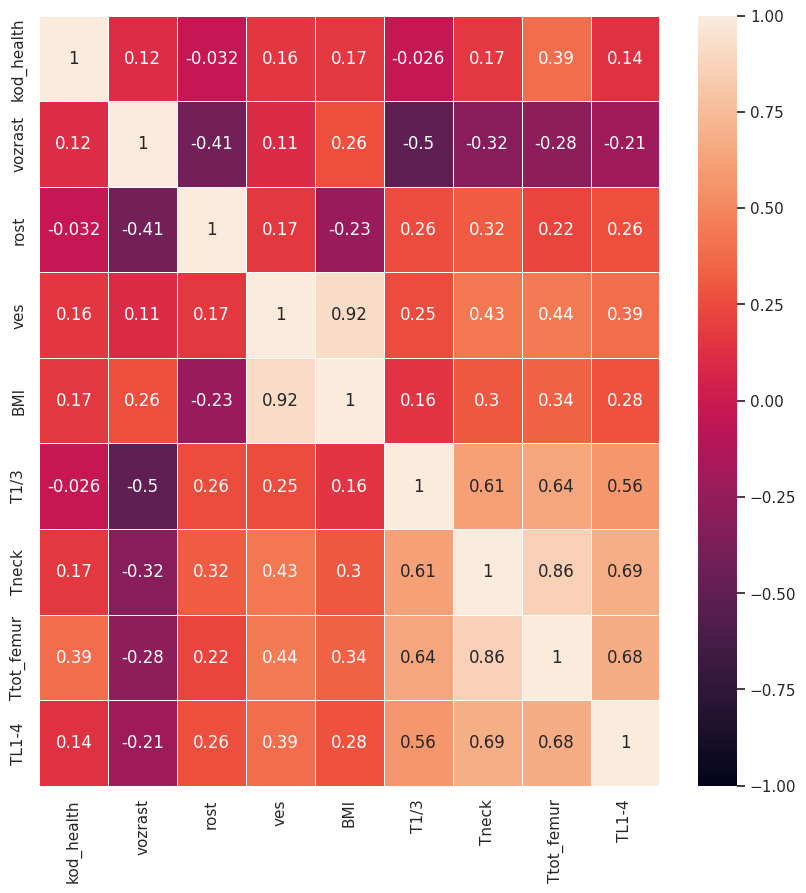

In [20]:
#detect correlation. pay attention for the last column - predicted value.
corr = df.corr(method = 'pearson')#pearson spearman kendall #pearson - defalut

#resize table
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, vmax=1,vmin=-1)


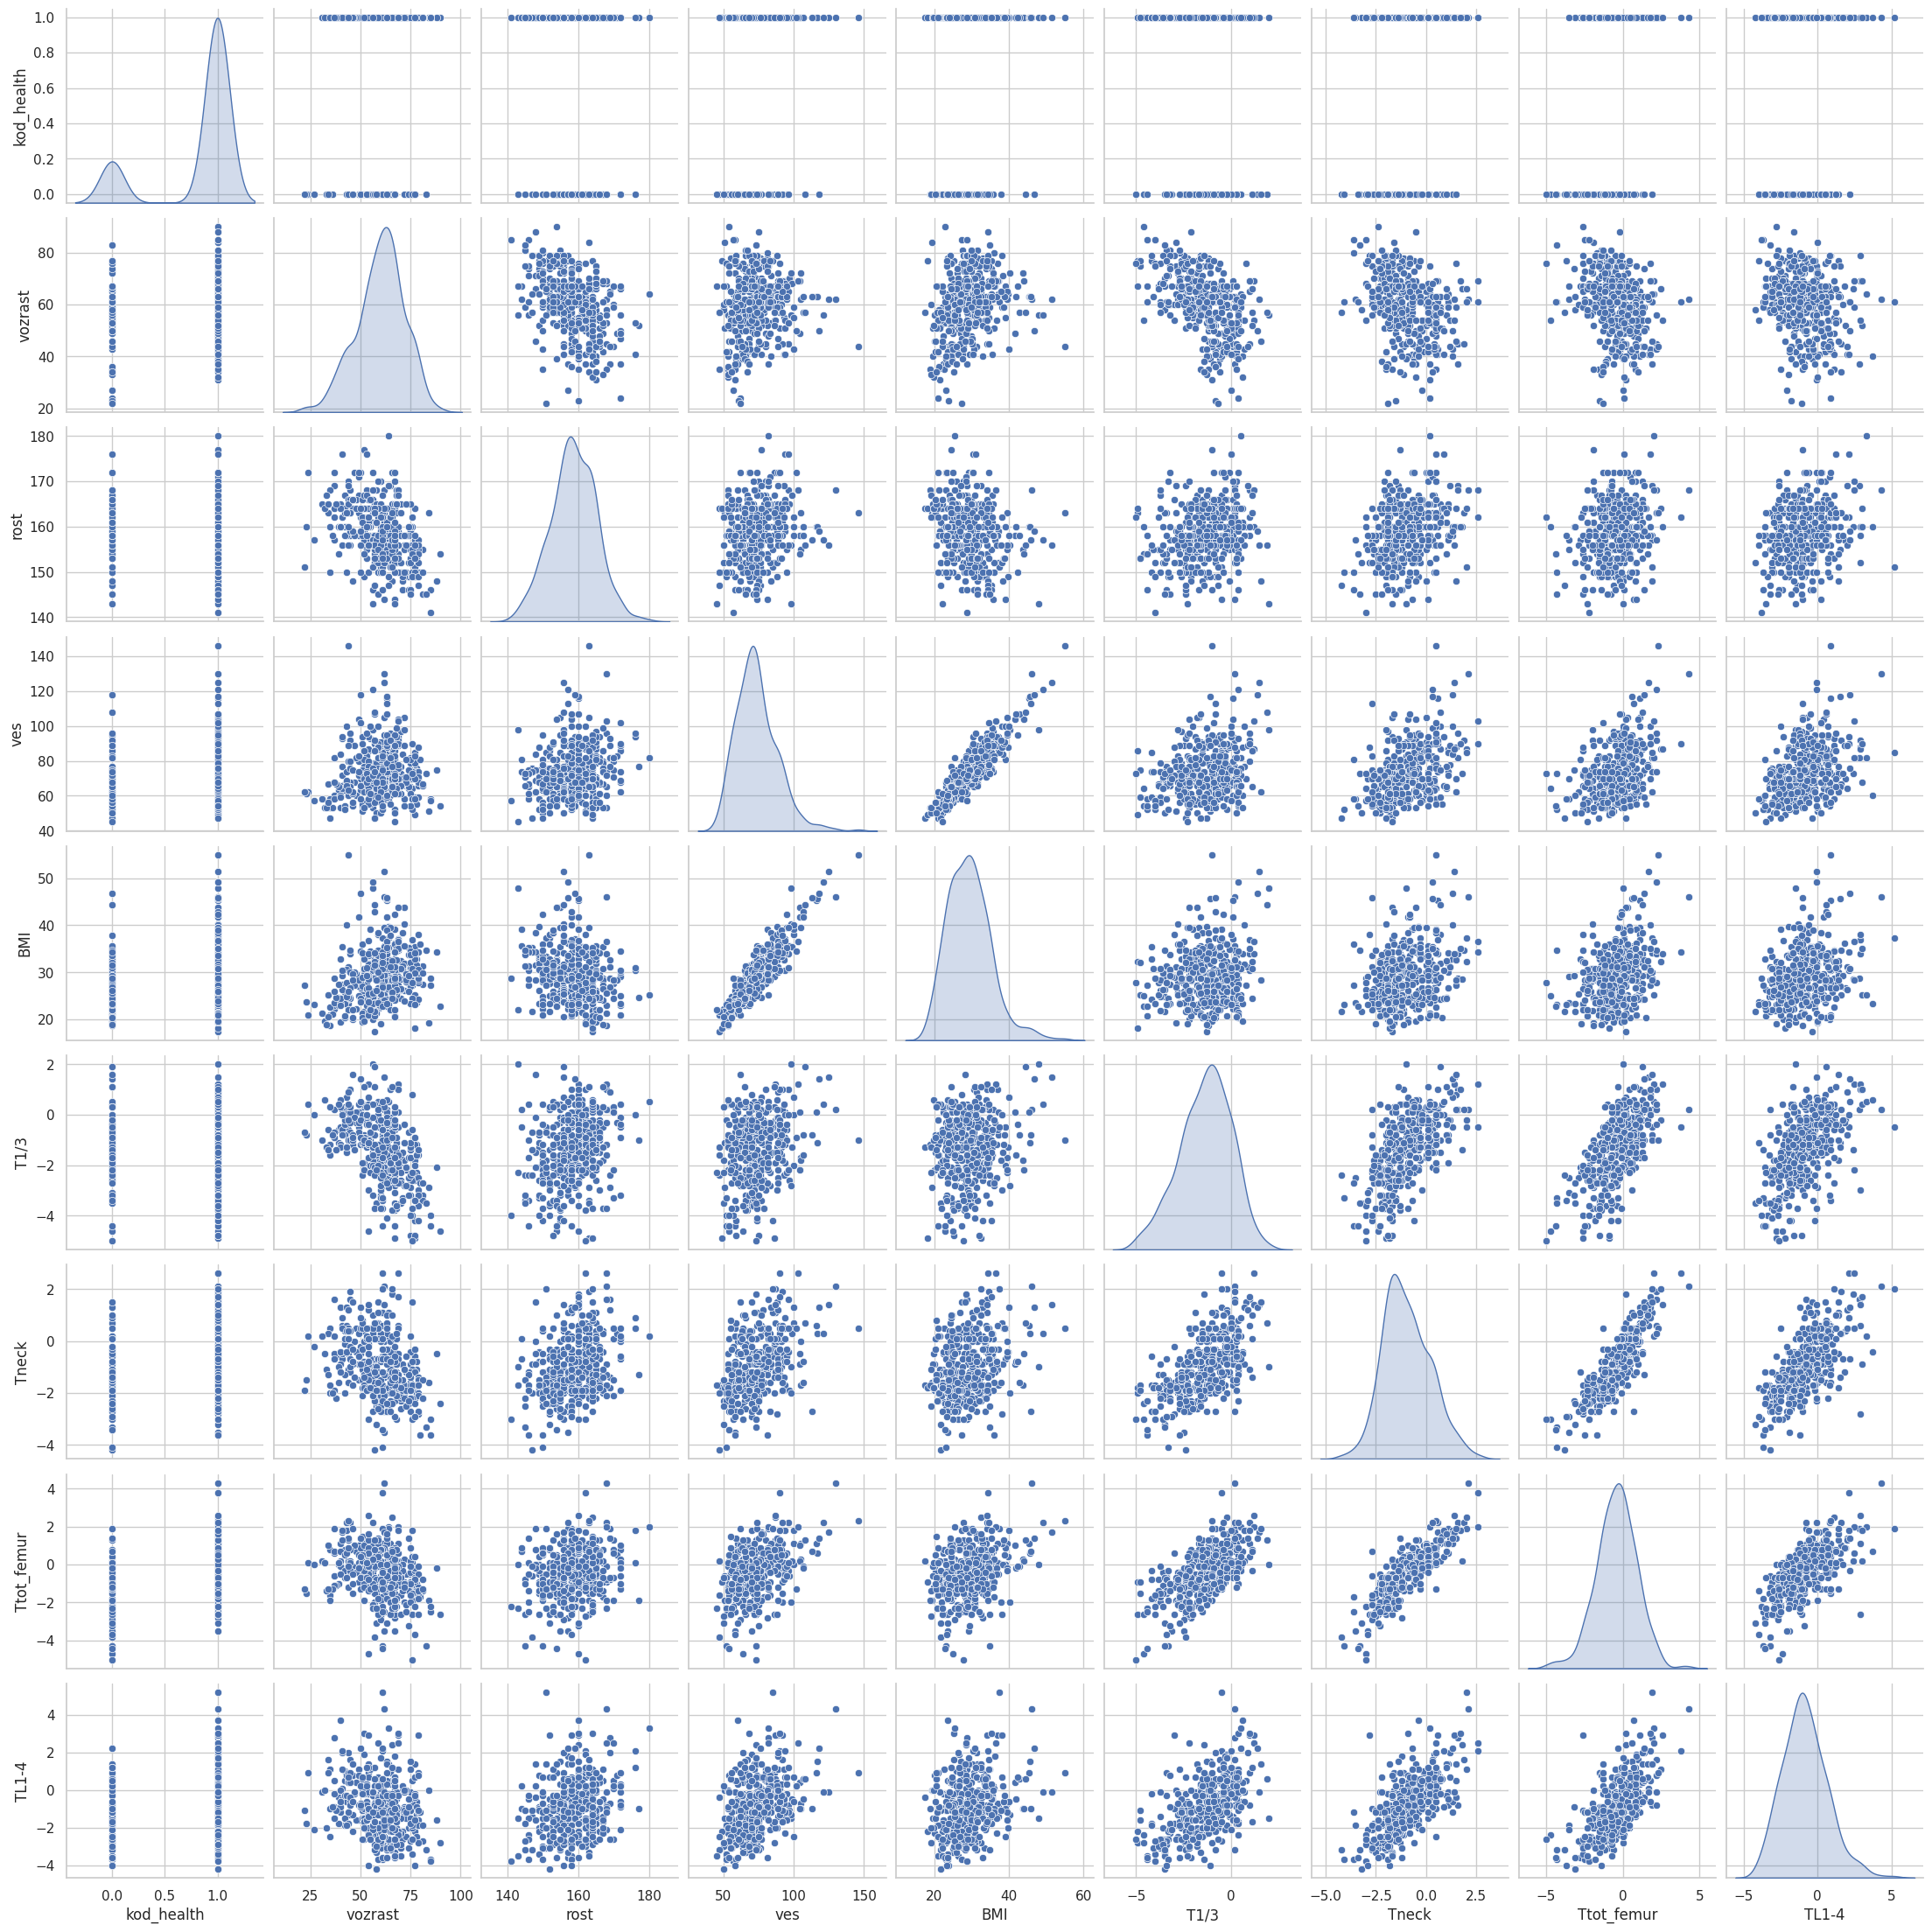

In [21]:
#Визуализация зависимостей в данных.
import seaborn as sns
sns.pairplot(data=df, diag_kind='kde')

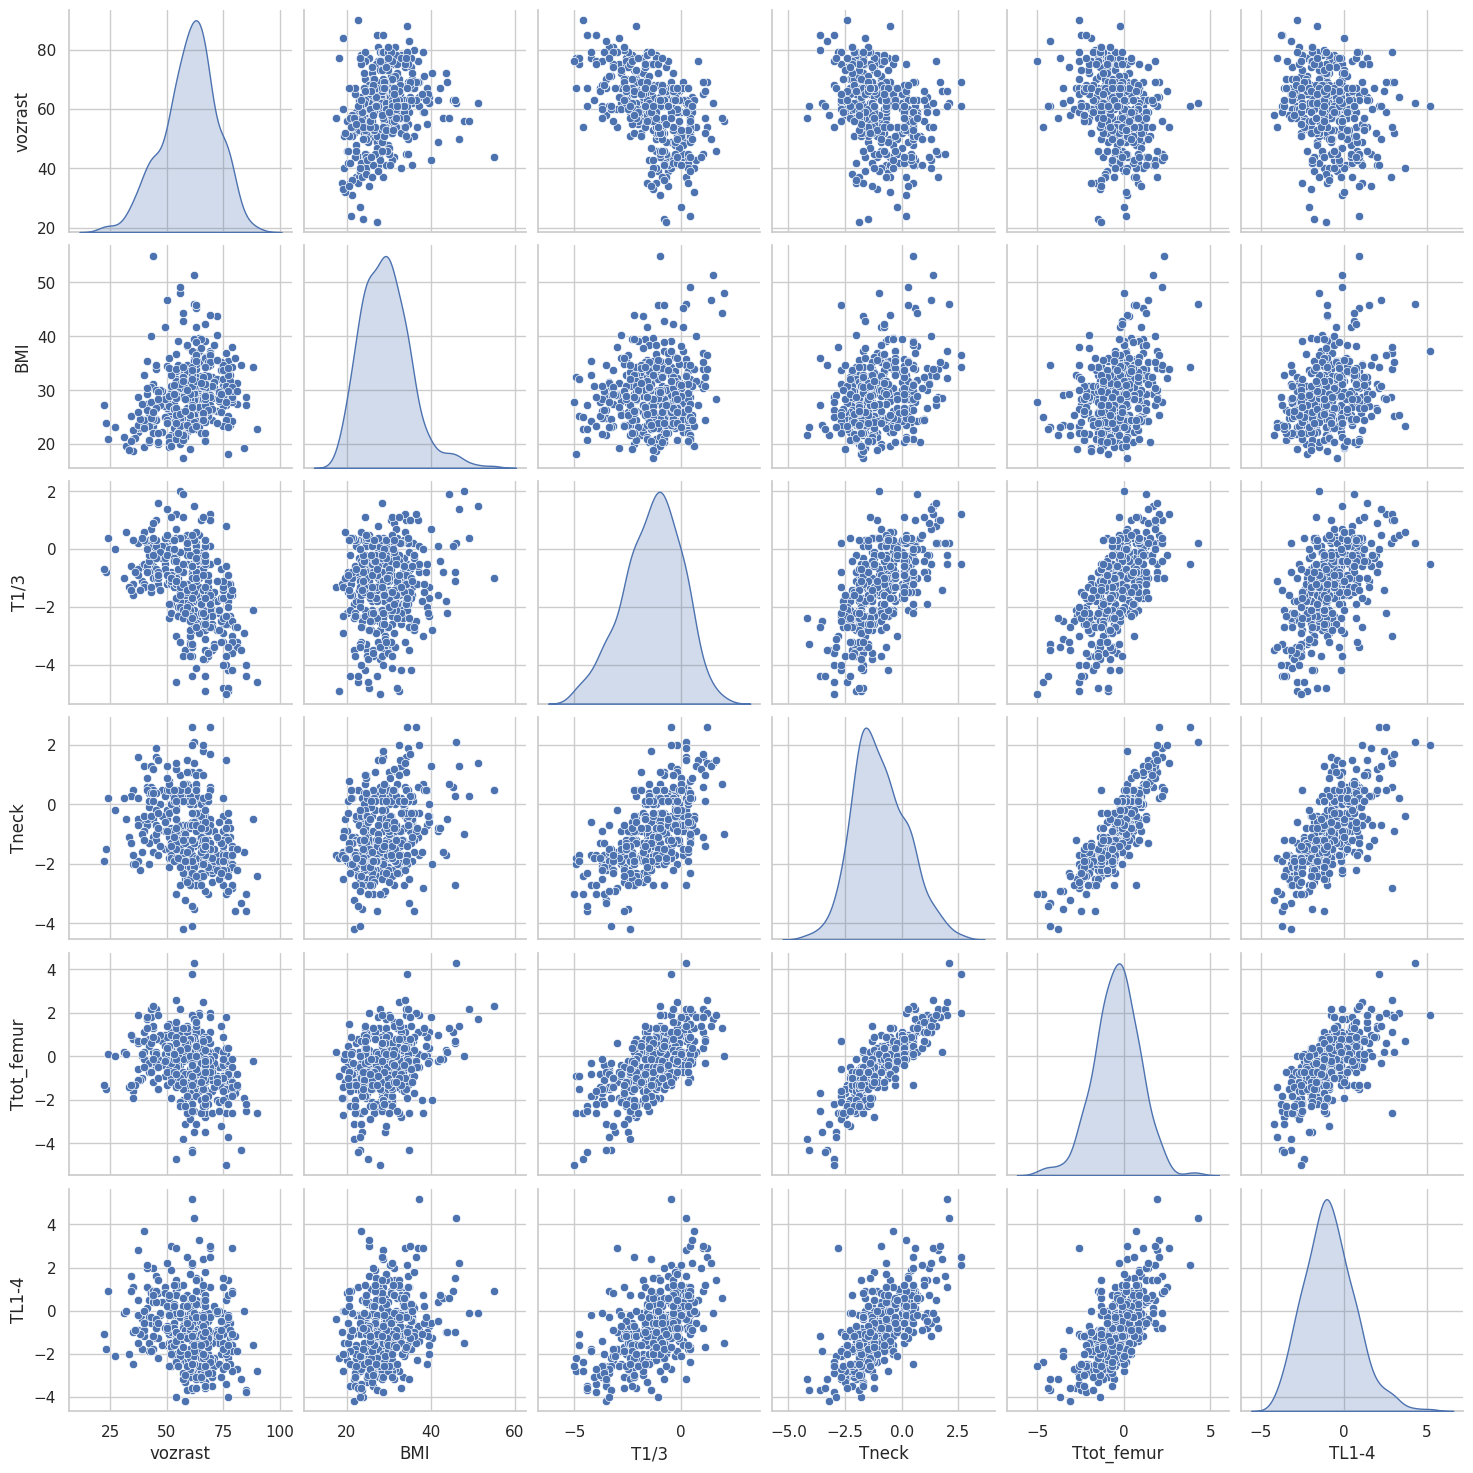

In [22]:
sns.pairplot(data=df, vars=['vozrast', 'BMI', 'T1/3', 'Tneck', 'Ttot_femur', 'TL1-4'], diag_kind='kde')

Проверка на нормальность

In [23]:
from scipy import stats
import scipy.stats as stat

In [24]:
#тест хи-квадрат
for col in df.columns:
    res = stats.chisquare(df[col])
    if res.pvalue < 0.05:
        print(f'{col} - Нет достаточных оснований отвергнуть нулевую гипотезу')
    else:
        print(f'{col} - Нет достаточных оснований принять нулевую гипотезу')

kod_health - Нет достаточных оснований принять нулевую гипотезу
vozrast - Нет достаточных оснований отвергнуть нулевую гипотезу
rost - Нет достаточных оснований принять нулевую гипотезу
ves - Нет достаточных оснований отвергнуть нулевую гипотезу
BMI - Нет достаточных оснований отвергнуть нулевую гипотезу
T1/3 - Нет достаточных оснований принять нулевую гипотезу
Tneck - Нет достаточных оснований принять нулевую гипотезу
Ttot_femur - Нет достаточных оснований принять нулевую гипотезу
TL1-4 - Нет достаточных оснований принять нулевую гипотезу


In [25]:
#Критерий Колмогорова-Смирнова
for col in df.columns:
    res = stats.kstest(df[col], cdf=stats.norm.cdf)
    if res.pvalue < 0.05:
        print(f'{col} - Нет достаточных оснований отвергнуть нулевую гипотезу')
    else:
        print(f'{col} - Нет достаточных оснований принять нулевую гипотезу')

kod_health - Нет достаточных оснований отвергнуть нулевую гипотезу
vozrast - Нет достаточных оснований отвергнуть нулевую гипотезу
rost - Нет достаточных оснований отвергнуть нулевую гипотезу
ves - Нет достаточных оснований отвергнуть нулевую гипотезу
BMI - Нет достаточных оснований отвергнуть нулевую гипотезу
T1/3 - Нет достаточных оснований отвергнуть нулевую гипотезу
Tneck - Нет достаточных оснований отвергнуть нулевую гипотезу
Ttot_femur - Нет достаточных оснований отвергнуть нулевую гипотезу
TL1-4 - Нет достаточных оснований отвергнуть нулевую гипотезу


In [26]:
#Критерий Шапиро-Уилки, p>0.05, в этом случае принимается нулевая гипотеза
for col in df.columns:
    res = stats.shapiro(df[col])
    if res.pvalue > 0.05:
        print(f'{col} - Нет достаточных оснований отвергнуть нулевую гипотезу')
    else:
        print(f'{col} - Нет достаточных оснований принять нулевую гипотезу')

kod_health - Нет достаточных оснований принять нулевую гипотезу
vozrast - Нет достаточных оснований принять нулевую гипотезу
rost - Нет достаточных оснований отвергнуть нулевую гипотезу
ves - Нет достаточных оснований принять нулевую гипотезу
BMI - Нет достаточных оснований принять нулевую гипотезу
T1/3 - Нет достаточных оснований принять нулевую гипотезу
Tneck - Нет достаточных оснований принять нулевую гипотезу
Ttot_femur - Нет достаточных оснований принять нулевую гипотезу
TL1-4 - Нет достаточных оснований принять нулевую гипотезу


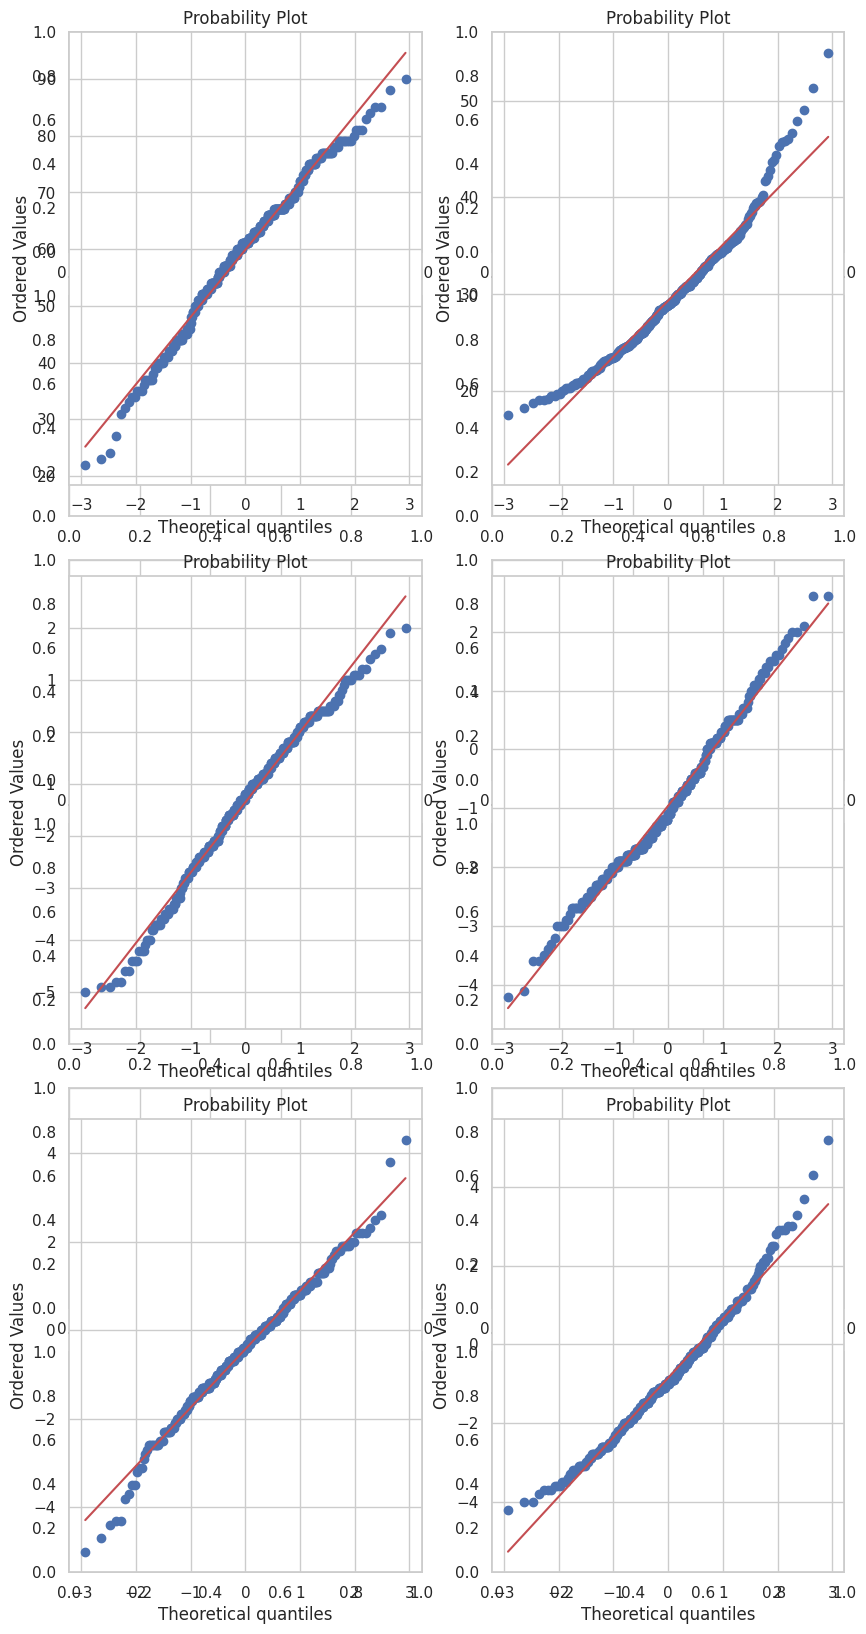

In [27]:
#вероятностный графический метод
plt.subplots(6,2,figsize=(10,20),)

ax1 = plt.subplot(321)
ax1 = stats.probplot(df['vozrast'], plot=plt)

ax2 = plt.subplot(322)
ax2 = stats.probplot(df['BMI'], plot=plt)

ax3 = plt.subplot(323)
ax3 = stats.probplot(df['T1/3'], plot=plt)

ax4 = plt.subplot(324)
ax4 = stats.probplot(df['Tneck'], plot=plt)

ax5 = plt.subplot(325)
ax5 = stats.probplot(df['Ttot_femur'], plot=plt)

ax6 = plt.subplot(326)
ax6 = stats.probplot(df['TL1-4'], plot=plt)


**2.2 Обучение и оценка моделей**

In [28]:
X = df.drop('kod_health', axis=1)
y = df['kod_health']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [29]:
# Стандартизация признаков (важно для логистической регрессии)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Метод логарифмичсекой регрессии

In [228]:
# Создание и обучение модели логистической регрессии
model = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [229]:
# Прогнозирование на тестовой выборке
y_pred_lr_original = model.predict(X_test_scaled)
y_pred_proba_lr_original = model.predict_proba(X_test_scaled)[:, 1]

In [230]:
# Оценка качества модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_lr_original)
print(f"Точность модели: {accuracy:.4f}")

Точность модели: 0.9012


In [231]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации:")
print(classification_report(y_test, y_pred_lr_original))


Отчёт о классификации:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.89      1.00      0.94        66

    accuracy                           0.90        81
   macro avg       0.95      0.73      0.79        81
weighted avg       0.91      0.90      0.89        81



In [232]:
# Матрица ошибок
cm_lr_original = confusion_matrix(y_test, y_pred_lr_original)
print("\nМатрица ошибок:")
print(cm_lr_original)


Матрица ошибок:
[[ 7  8]
 [ 0 66]]



ROC AUC: 0.9333


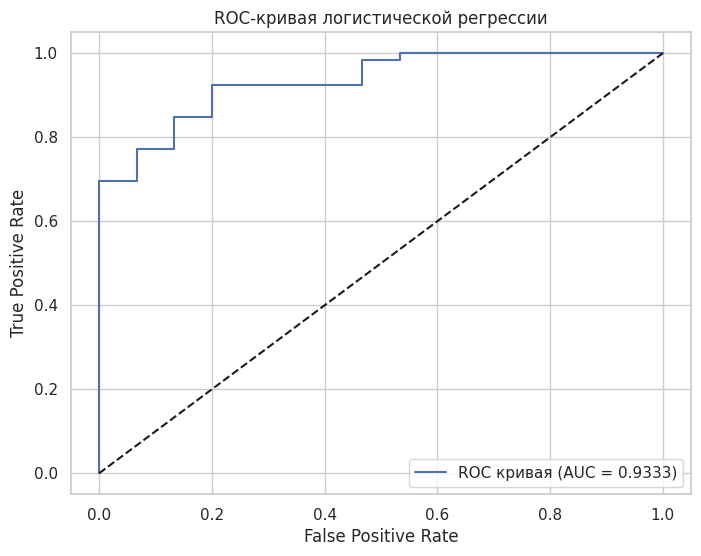

In [233]:
# ROC-кривая и значение AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_lr_original)
print(f"\nROC AUC: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr_original)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая логистической регрессии')
plt.legend(loc='lower right')
plt.show()

In [234]:
# Получение и анализ коэффициентов модели
coefficients = pd.DataFrame({
'Признак': X.columns,
'Коэффициент': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Коэффициент', ascending=False)
print("\nКоэффициенты модели:")
print(coefficients)


Коэффициенты модели:
      Признак  Коэффициент
6  Ttot_femur     3.382069
3         BMI     0.239872
2         ves     0.099769
1        rost     0.097403
0     vozrast     0.025122
7       TL1-4    -0.014535
5       Tneck    -1.433498
4        T1/3    -1.528213


дерево решений

In [236]:
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение модели Decision Tree Classifier
model_dt_original = DecisionTreeClassifier(random_state=42)
model_dt_original.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [239]:
# Прогнозирование на тестовой выборке
y_pred_dt_original = model_dt_original.predict(X_test_scaled)
y_pred_proba_dt_original = model_dt_original.predict_proba(X_test_scaled)[:, 1]

In [240]:
# Оценка качества модели
accuracy_dt_original = accuracy_score(y_test, y_pred_dt_original)
print(f"Точность модели Дерево решений (DT): {accuracy_dt_original:.4f}")

Точность модели Дерево решений (DT): 0.7778


In [241]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Дерево решений (DT)):")
print(classification_report(y_test, y_pred_dt_original))


Отчёт о классификации (Дерево решений (DT)):
              precision    recall  f1-score   support

           0       0.43      0.60      0.50        15
           1       0.90      0.82      0.86        66

    accuracy                           0.78        81
   macro avg       0.66      0.71      0.68        81
weighted avg       0.81      0.78      0.79        81



In [242]:
# Матрица ошибок
cm_dt_original = confusion_matrix(y_test, y_pred_dt_original)
print("\nМатрица ошибок (Дерево решений (DT)):")
print(cm_dt_original)


Матрица ошибок (Дерево решений (DT)):
[[ 9  6]
 [12 54]]



ROC AUC (Дерево решений (DT)): 0.7091


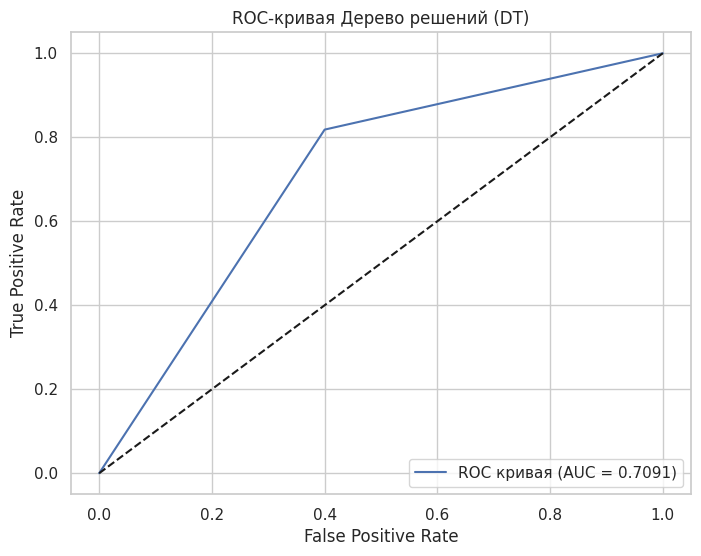

In [247]:
# ROC-кривая и значение AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt_original)
print(f"\nROC AUC (Дерево решений (DT)): {roc_auc_dt:.4f}")

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt_original)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC кривая (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Дерево решений (DT)')
plt.legend(loc='lower right')
plt.show()

Наивный байесовский классификатор Бернулли (BNB)

In [249]:
# Создание и обучение модели Наивного Байеса Бернулли
model_bnb_original = BernoulliNB()
model_bnb_original.fit(X_train_scaled, y_train)

BernoulliNB()

In [250]:
# Прогнозирование на тестовой выборке
y_pred_bnb_original = model_bnb_original.predict(X_test_scaled)
y_pred_proba_bnb_original = model_bnb_original.predict_proba(X_test_scaled)[:, 1]

In [251]:
# Оценка качества модели
accuracy_bnb_original = accuracy_score(y_test, y_pred_bnb_original)
print(f"Точность модели Наивного Байеса Бернулли: {accuracy_bnb_original:.4f}")

Точность модели Наивного Байеса Бернулли: 0.6914


In [252]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Наивный Байес Бернулли):")
print(classification_report(y_test, y_pred_bnb_original))


Отчёт о классификации (Наивный Байес Бернулли):
              precision    recall  f1-score   support

           0       0.29      0.47      0.36        15
           1       0.86      0.74      0.80        66

    accuracy                           0.69        81
   macro avg       0.58      0.60      0.58        81
weighted avg       0.75      0.69      0.72        81



In [253]:
# Матрица ошибок
cm_bnb_original = confusion_matrix(y_test, y_pred_bnb_original)
print("\nМатрица ошибок (Наивный Байес Бернулли)):")
print(cm_bnb_original)


Матрица ошибок (Наивный Байес Бернулли)):
[[ 7  8]
 [17 49]]



ROC AUC (Наивный Байес Бернулли)): 0.6354


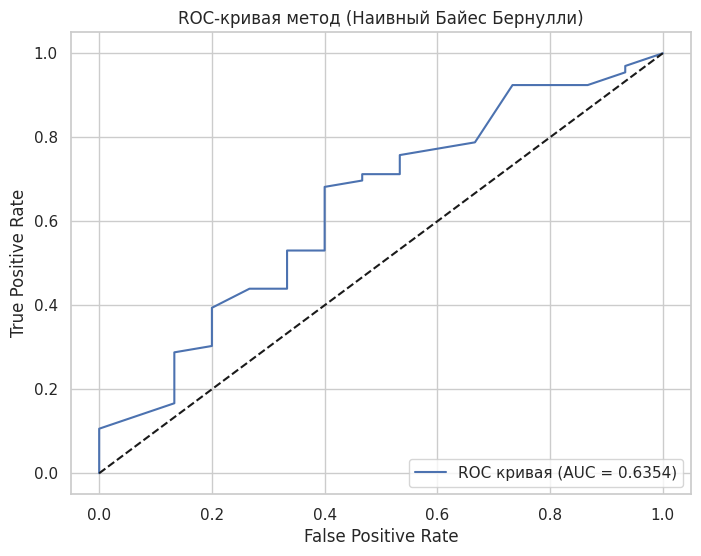

In [254]:
# ROC-кривая и значение AUC
roc_auc_bnb = roc_auc_score(y_test, y_pred_proba_bnb_original)
print(f"\nROC AUC (Наивный Байес Бернулли)): {roc_auc_bnb:.4f}")

fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_pred_proba_bnb_original)
plt.figure(figsize=(8, 6))
plt.plot(fpr_bnb, tpr_bnb, label=f'ROC кривая (AUC = {roc_auc_bnb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая метод (Наивный Байес Бернулли)')
plt.legend(loc='lower right')
plt.show()

Метод опорных векторов (SVM)

In [255]:
# Создание и обучение модели Метод опорных векторов (SVM)
model_svc_original = SVC(probability=True, random_state=42)
model_svc_original.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [256]:
# Прогнозирование на тестовой выборке
y_pred_svc_original = model_svc_original.predict(X_test_scaled)
y_pred_proba_svc_original = model_svc_original.predict_proba(X_test_scaled)[:, 1]

In [257]:
# Оценка качества модели
accuracy_svc_original = accuracy_score(y_test, y_pred_svc_original)
print(f"Точность модели Метод опорных векторов (SVM): {accuracy_svc_original:.4f}")

Точность модели Метод опорных векторов (SVM): 0.8519


In [258]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Метод опорных векторов (SVM)):")
print(classification_report(y_test, y_pred_svc_original))


Отчёт о классификации (Метод опорных векторов (SVM)):
              precision    recall  f1-score   support

           0       0.80      0.27      0.40        15
           1       0.86      0.98      0.92        66

    accuracy                           0.85        81
   macro avg       0.83      0.63      0.66        81
weighted avg       0.85      0.85      0.82        81



In [259]:
# Матрица ошибок
cm_svc_original = confusion_matrix(y_test, y_pred_svc_original)
print("\nМатрица ошибок (Метод опорных векторов (SVM)):")
print(cm_svc_original)


Матрица ошибок (Метод опорных векторов (SVM)):
[[ 4 11]
 [ 1 65]]



ROC AUC (Метод опорных векторов (SVM)): 0.8566


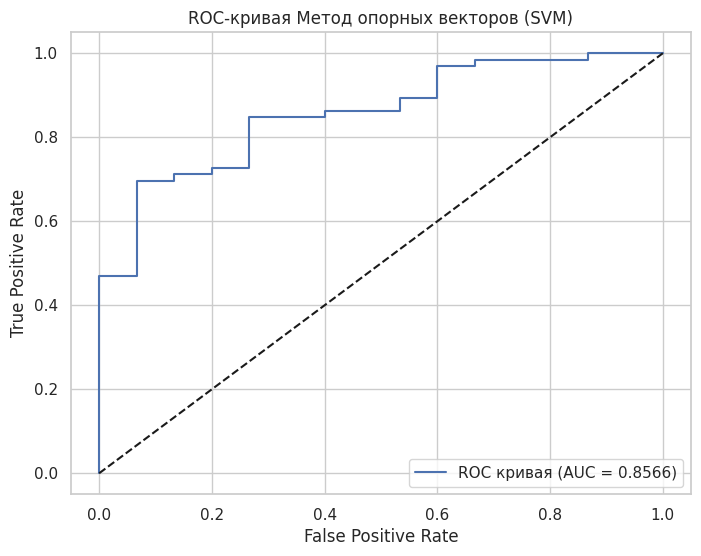

In [260]:
# ROC-кривая и значение AUC
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc_original)
print(f"\nROC AUC (Метод опорных векторов (SVM)): {roc_auc_svc:.4f}")

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc_original)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'ROC кривая (AUC = {roc_auc_svc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Метод опорных векторов (SVM)')
plt.legend(loc='lower right')
plt.show()

Метод k-ближайших соседей (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [261]:
# Создание и обучение модели K-ближайших соседей (KNN)
# Можно настроить количество соседей (n_neighbors) и метрику расстояния (metric)
model_knn_original = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # Вы можете экспериментировать с n_neighbors
model_knn_original.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [262]:
# Прогнозирование на тестовой выборке
y_pred_knn_original = model_knn.predict(X_test_scaled)
y_pred_proba_knn_original = model_knn.predict_proba(X_test_scaled)[:, 1]

In [263]:
# Оценка качества модели
accuracy_knn_original = accuracy_score(y_test, y_pred_knn_original)
print(f"Точность модели метода k-ближайших соседей (KNN): {accuracy_knn_original:.4f}")

Точность модели метода k-ближайших соседей (KNN): 0.7531


In [264]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Метод k-ближайших соседей (KNN)):")
print(classification_report(y_test, y_pred_knn_original))


Отчёт о классификации (Метод k-ближайших соседей (KNN)):
              precision    recall  f1-score   support

           0       0.41      0.73      0.52        15
           1       0.93      0.76      0.83        66

    accuracy                           0.75        81
   macro avg       0.67      0.75      0.68        81
weighted avg       0.83      0.75      0.78        81



In [265]:
# Матрица ошибок
cm_knn_original = confusion_matrix(y_test, y_pred_knn_original)
print("\nМатрица ошибок (Метод k-ближайших соседей (KNN)):")
print(cm_knn_original)


Матрица ошибок (Метод k-ближайших соседей (KNN)):
[[11  4]
 [16 50]]



ROC AUC (Метод k-ближайших соседей (KNN)): 0.7596


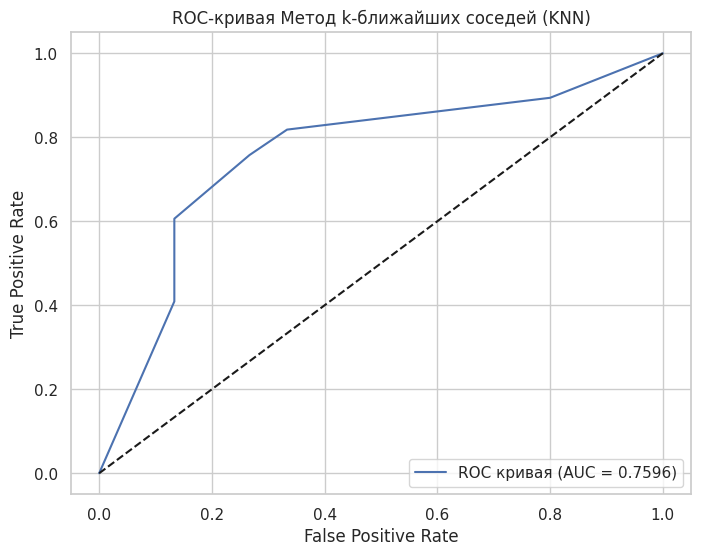

In [266]:
# ROC-кривая и значение AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn_original)
print(f"\nROC AUC (Метод k-ближайших соседей (KNN)): {roc_auc_knn:.4f}")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn_original)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC кривая (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Метод k-ближайших соседей (KNN)')
plt.legend(loc='lower right')
plt.show()

СОЗДАНИЕ НЕЙРОННОЙ СЕТИ

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

In [63]:
# 4. СОЗДАНИЕ НЕЙРОННОЙ СЕТИ
model = models.Sequential()

# Входной слой + первый скрытый слой
# 16 нейронов, активация ReLU (стандарт для скрытых слоев)
model.add(layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Второй скрытый слой (для выявления более сложных зависимостей)
model.add(layers.Dense(8, activation='relu'))

# Слой Dropout (отключает 20% нейронов случайно, чтобы избежать переобучения)
model.add(layers.Dropout(0.2))

# Выходной слой
# 1 нейрон, активация Sigmoid (выдает вероятность от 0 до 1)
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Функция потерь для бинарной классификации
              metrics=['accuracy'])

In [65]:

# 5. ОБУЧЕНИЕ МОДЕЛИ
# epochs=50 - сколько раз модель пройдет через все данные
# batch_size=10 - порциями по 10 примеров
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3026 - loss: 0.8510 - val_accuracy: 0.2308 - val_loss: 0.8071
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4209 - loss: 0.7340 - val_accuracy: 0.3846 - val_loss: 0.7376
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5196 - loss: 0.7008 - val_accuracy: 0.6308 - val_loss: 0.6950
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7097 - loss: 0.6746 - val_accuracy: 0.7846 - val_loss: 0.6645
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7485 - loss: 0.6624 - val_accuracy: 0.8154 - val_loss: 0.6388
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8101 - loss: 0.6375 - val_accuracy: 0.8462 - val_loss: 0.6108
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8142 - loss: 0.6225 - val_accuracy: 0.8462 - val_loss: 0.5774
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8290 - loss: 0.5974 - val_accuracy: 0.8462 - val_loss

In [66]:
# 6. ОЦЕНКА РЕЗУЛЬТАТОВ
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n--- Результаты на тестовых данных ---")
print(f"Точность (Accuracy): {accuracy*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8657 - loss: 0.2773

--- Результаты на тестовых данных ---
Точность (Accuracy): 86.42%


In [268]:
# Детальный отчет
y_pred_prob_nn_original = model.predict(X_test_scaled)
y_pred_nn_original= (y_pred_prob_nn_original > 0.5).astype(int) # Перевод вероятности в классы 0 или 1

print("\n--- Отчет классификации ---")
print(classification_report(y_test, y_pred_nn_original))




--- Отчет классификации ---
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.89      1.00      0.94        66

    accuracy                           0.90        81
   macro avg       0.95      0.73      0.79        81
weighted avg       0.91      0.90      0.89        81



In [269]:
# Матрица ошибок
cm_nn_original = confusion_matrix(y_test, y_pred_nn_original)
print("\nМатрица ошибок:")
print(cm_nn_original)


Матрица ошибок:
[[ 7  8]
 [ 0 66]]


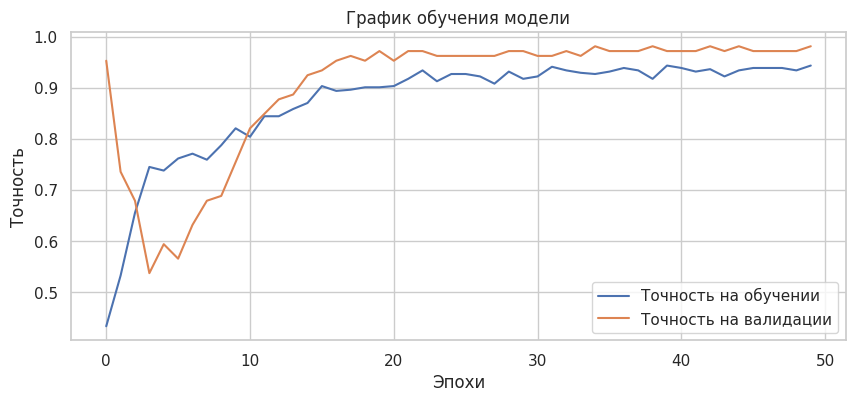

In [270]:
# 7. ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('График обучения модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

Сравнение результатов моделей

In [271]:
print("Логистическая регрессия (LR):\n", classification_report(y_test, y_pred_lr_original))
print("Дерево решений (DT):\n", classification_report(y_test, y_pred_dt_original))
print("Наивный байесовский классификатор (BNB):\n", classification_report(y_test, y_pred_bnb_original))
print("Метод опорных векторов (SVM):\n", classification_report(y_test, y_pred_svc_original))
print("Метод k-ближайших соседей (KNN):\n", classification_report(y_test, y_pred_knn_original))
print("Нейронная сеть (NN):\n", classification_report(y_test, y_pred_nn_original))

Логистическая регрессия (LR):
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.89      1.00      0.94        66

    accuracy                           0.90        81
   macro avg       0.95      0.73      0.79        81
weighted avg       0.91      0.90      0.89        81

Дерево решений (DT):
               precision    recall  f1-score   support

           0       0.43      0.60      0.50        15
           1       0.90      0.82      0.86        66

    accuracy                           0.78        81
   macro avg       0.66      0.71      0.68        81
weighted avg       0.81      0.78      0.79        81

Наивный байесовский классификатор (BNB):
               precision    recall  f1-score   support

           0       0.29      0.47      0.36        15
           1       0.86      0.74      0.80        66

    accuracy                           0.69        81
   macro avg       0.58      0.60

**Обучение моделей после применения метода SMOTE**

In [73]:
from imblearn.over_sampling import SMOTE

# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Размерность X_train после SMOTE:", X_train_resampled.shape)
print("Распределение классов y_train после SMOTE:\n", y_train_resampled.value_counts())

Размерность X_train после SMOTE: (530, 8)
Распределение классов y_train после SMOTE:
 kod_health
1    265
0    265
Name: count, dtype: int64


Метод логарифмичсекой регрессии

In [183]:
# Создание и обучение модели логистической регрессии
model = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42, solver='liblinear')

In [184]:
# Прогнозирование на тестовой выборке
y_pred_lr_smote = model.predict(X_test_scaled)
y_pred_proba_lr_smote = model.predict_proba(X_test_scaled)[:, 1]

In [185]:
# Оценка качества модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_lr_smote)
print(f"Точность модели: {accuracy:.4f}")

Точность модели: 0.8519


In [186]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации:")
print(classification_report(y_test, y_pred_lr_smote))


Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.97      0.85      0.90        66

    accuracy                           0.85        81
   macro avg       0.77      0.86      0.79        81
weighted avg       0.89      0.85      0.86        81



In [187]:
# Матрица ошибок
cm_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)
print("\nМатрица ошибок:")
print(cm_lr_smote)


Матрица ошибок:
[[13  2]
 [10 56]]



ROC AUC: 0.9535


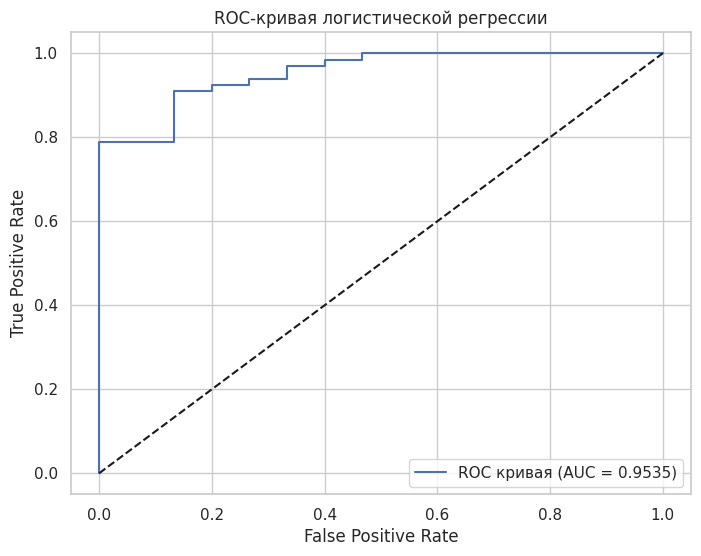

In [188]:
# ROC-кривая и значение AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_lr_smote)
print(f"\nROC AUC: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая логистической регрессии')
plt.legend(loc='lower right')
plt.show()

In [189]:
# Получение и анализ коэффициентов модели
coefficients = pd.DataFrame({
'Признак': X.columns,
'Коэффициент': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Коэффициент', ascending=False)
print("\nКоэффициенты модели:")
print(coefficients)


Коэффициенты модели:
      Признак  Коэффициент
6  Ttot_femur     5.147992
3         BMI     0.438867
1        rost     0.058823
7       TL1-4     0.041970
0     vozrast    -0.044824
2         ves    -0.115225
4        T1/3    -2.274353
5       Tneck    -2.436507


дерево решений

In [190]:
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение модели Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [191]:
# Прогнозирование на тестовой выборке
y_pred_dt_smote = model_dt.predict(X_test_scaled)
y_pred_proba_dt_smote = model_dt.predict_proba(X_test_scaled)[:, 1]

In [192]:
# Оценка качества модели
accuracy_dt = accuracy_score(y_test, y_pred_dt_smote)
print(f"Точность модели Дерево решений (DT): {accuracy_dt:.4f}")

Точность модели Дерево решений (DT): 0.7531


In [194]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Дерево решений (DT)):")
print(classification_report(y_test, y_pred_dt_smote))


Отчёт о классификации (Дерево решений (DT)):
              precision    recall  f1-score   support

           0       0.41      0.73      0.52        15
           1       0.93      0.76      0.83        66

    accuracy                           0.75        81
   macro avg       0.67      0.75      0.68        81
weighted avg       0.83      0.75      0.78        81



In [195]:
# Матрица ошибок
cm_dt_smote = confusion_matrix(y_test, y_pred_dt_smote)
print("\nМатрица ошибок (Дерево решений (DT)):")
print(cm_dt)


Матрица ошибок (Дерево решений (DT)):
[[ 9  6]
 [12 54]]



ROC AUC (Дерево решений (DT)): 0.7455


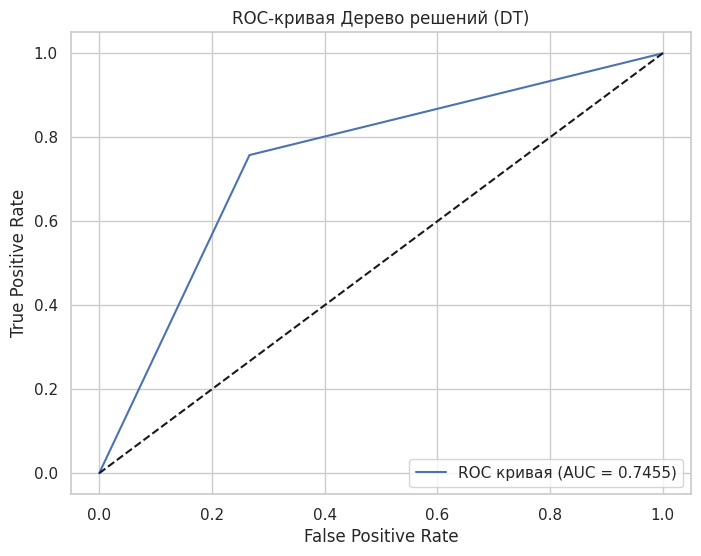

In [197]:
# ROC-кривая и значение AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt_smote)
print(f"\nROC AUC (Дерево решений (DT)): {roc_auc_dt:.4f}")

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC кривая (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Дерево решений (DT)')
plt.legend(loc='lower right')
plt.show()

Наивный байесовский классификатор Бернулли (BNB)

In [198]:
from sklearn.naive_bayes import BernoulliNB

In [199]:
# Создание и обучение модели Наивного Байеса Бернулли
model_bnb = BernoulliNB()
model_bnb.fit(X_train_resampled, y_train_resampled)

BernoulliNB()

In [201]:
# Прогнозирование на тестовой выборке
y_pred_bnb_smote = model_bnb.predict(X_test_scaled)
y_pred_proba_bnb_smote = model_bnb.predict_proba(X_test_scaled)[:, 1]

In [202]:
# Оценка качества модели
accuracy_bnb = accuracy_score(y_test, y_pred_bnb_smote)
print(f"Точность модели Наивного Байеса Бернулли: {accuracy_bnb:.4f}")

Точность модели Наивного Байеса Бернулли: 0.6049


In [203]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Наивный Байес Бернулли):")
print(classification_report(y_test, y_pred_bnb_smote))


Отчёт о классификации (Наивный Байес Бернулли):
              precision    recall  f1-score   support

           0       0.26      0.60      0.36        15
           1       0.87      0.61      0.71        66

    accuracy                           0.60        81
   macro avg       0.56      0.60      0.54        81
weighted avg       0.76      0.60      0.65        81



In [204]:
# Матрица ошибок
cm_bnb_smote = confusion_matrix(y_test, y_pred_bnb_smote)
print("\nМатрица ошибок (Наивный Байес Бернулли)):")
print(cm_bnb_smote)


Матрица ошибок (Наивный Байес Бернулли)):
[[ 9  6]
 [26 40]]



ROC AUC (Наивный Байес Бернулли)): 0.6525


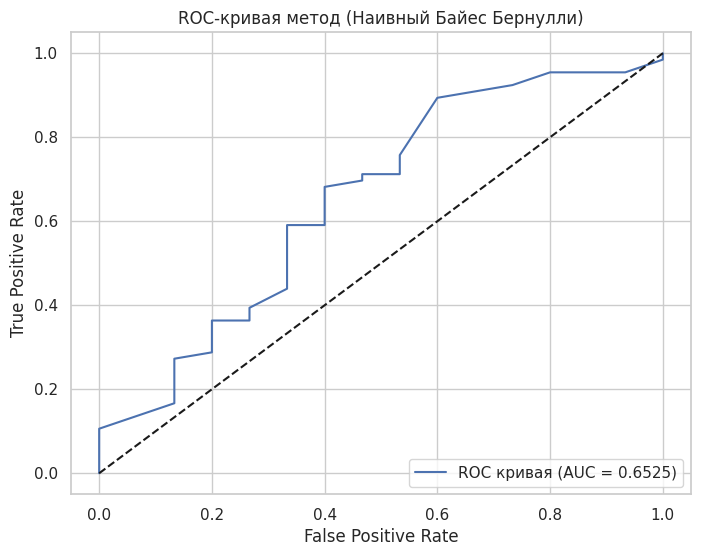

In [205]:
# ROC-кривая и значение AUC
roc_auc_bnb = roc_auc_score(y_test, y_pred_proba_bnb_smote)
print(f"\nROC AUC (Наивный Байес Бернулли)): {roc_auc_bnb:.4f}")

fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_pred_proba_bnb_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_bnb, tpr_bnb, label=f'ROC кривая (AUC = {roc_auc_bnb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая метод (Наивный Байес Бернулли)')
plt.legend(loc='lower right')
plt.show()

Метод опорных векторов (SVM)

In [206]:
# Создание и обучение модели Метод опорных векторов (SVM)
model_svc = SVC(probability=True, random_state=42)
model_svc.fit(X_train_resampled, y_train_resampled)

SVC(probability=True, random_state=42)

In [207]:
# Прогнозирование на тестовой выборке
y_pred_svc_smote = model_svc.predict(X_test_scaled)
y_pred_proba_svc_smote = model_svc.predict_proba(X_test_scaled)[:, 1]

In [176]:
# Оценка качества модели
accuracy_svc = accuracy_score(y_test, y_pred_svc_smote)
print(f"Точность модели Метод опорных векторов (SVM): {accuracy_svc:.4f}")

Точность модели Метод опорных векторов (SVM): 0.7901


In [177]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Метод опорных векторов (SVM)):")
print(classification_report(y_test, y_pred_svc_smote, zero_division=0))


Отчёт о классификации (Метод опорных векторов (SVM)):
              precision    recall  f1-score   support

           0       0.45      0.67      0.54        15
           1       0.92      0.82      0.86        66

    accuracy                           0.79        81
   macro avg       0.68      0.74      0.70        81
weighted avg       0.83      0.79      0.80        81



In [178]:
# Матрица ошибок
cm_svc_smote = confusion_matrix(y_test, y_pred_svc_smote)
print("\nМатрица ошибок (Метод опорных векторов (SVM)):")
print(cm_svc_smote)


Матрица ошибок (Метод опорных векторов (SVM)):
[[10  5]
 [12 54]]



ROC AUC (Метод опорных векторов (SVM)): 0.8919


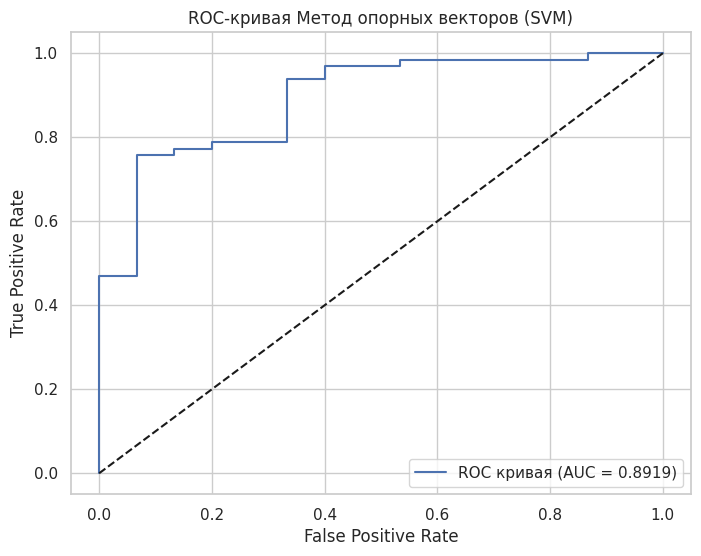

In [208]:
# ROC-кривая и значение AUC
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc_smote)
print(f"\nROC AUC (Метод опорных векторов (SVM)): {roc_auc_svc:.4f}")

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'ROC кривая (AUC = {roc_auc_svc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Метод опорных векторов (SVM)')
plt.legend(loc='lower right')
plt.show()

Метод k-ближайших соседей (KNN)

In [209]:
# Создание и обучение модели K-ближайших соседей (KNN)
# Можно настроить количество соседей (n_neighbors) и метрику расстояния (metric)
model_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # Вы можете экспериментировать с n_neighbors
model_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='euclidean')

In [210]:
# Прогнозирование на тестовой выборке
y_pred_knn_smote = model_knn.predict(X_test_scaled)
y_pred_proba_knn_smote = model_knn.predict_proba(X_test_scaled)[:, 1]

In [172]:
# Оценка качества модели
accuracy_knn = accuracy_score(y_test, y_pred_knn_smote)
print(f"Точность модели метода k-ближайших соседей (KNN): {accuracy_knn:.4f}")

Точность модели метода k-ближайших соседей (KNN): 0.7531


In [211]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Метод k-ближайших соседей (KNN)):")
print(classification_report(y_test, y_pred_knn_smote))


Отчёт о классификации (Метод k-ближайших соседей (KNN)):
              precision    recall  f1-score   support

           0       0.41      0.73      0.52        15
           1       0.93      0.76      0.83        66

    accuracy                           0.75        81
   macro avg       0.67      0.75      0.68        81
weighted avg       0.83      0.75      0.78        81



In [212]:
# Матрица ошибок
cm_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)
print("\nМатрица ошибок (Метод k-ближайших соседей (KNN)):")
print(cm_knn_smote)


Матрица ошибок (Метод k-ближайших соседей (KNN)):
[[11  4]
 [16 50]]



ROC AUC (Метод k-ближайших соседей (KNN)): 0.7596


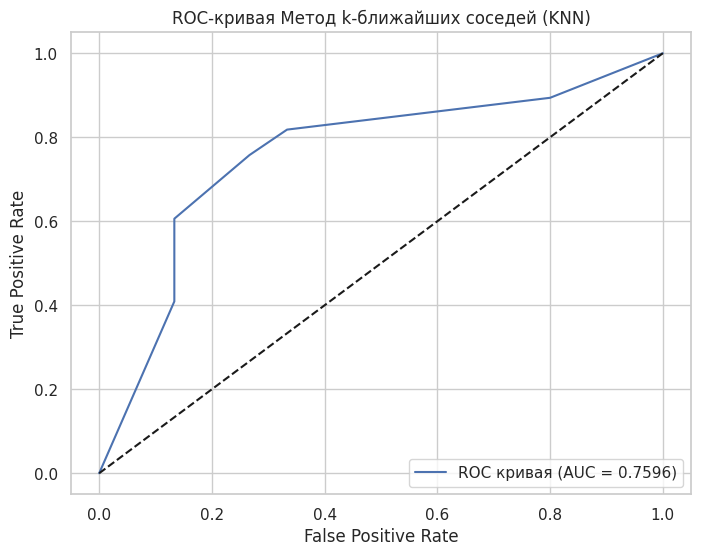

In [213]:
# ROC-кривая и значение AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn_smote)
print(f"\nROC AUC (Метод k-ближайших соседей (KNN)): {roc_auc_knn:.4f}")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC кривая (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Метод k-ближайших соседей (KNN)')
plt.legend(loc='lower right')
plt.show()

СОЗДАНИЕ НЕЙРОННОЙ СЕТИ

In [215]:
# 4. СОЗДАНИЕ НЕЙРОННОЙ СЕТИ
model = models.Sequential()

# Входной слой + первый скрытый слой
# 16 нейронов, активация ReLU (стандарт для скрытых слоев)
model.add(layers.Dense(16, activation='relu', input_shape=(X_train_resampled.shape[1],)))

# Второй скрытый слой (для выявления более сложных зависимостей)
model.add(layers.Dense(8, activation='relu'))

# Слой Dropout (отключает 20% нейронов случайно, чтобы избежать переобучения)
model.add(layers.Dropout(0.2))

# Выходной слой
# 1 нейрон, активация Sigmoid (выдает вероятность от 0 до 1)
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [216]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Функция потерь для бинарной классификации
              metrics=['accuracy'])

In [217]:
# 5. ОБУЧЕНИЕ МОДЕЛИ
# epochs=50 - сколько раз модель пройдет через все данные
# batch_size=10 - порциями по 10 примеров
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4186 - loss: 0.7875 - val_accuracy: 0.9528 - val_loss: 0.5338
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 0.7002 - val_accuracy: 0.7358 - val_loss: 0.6003
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 0.6405 - val_accuracy: 0.6792 - val_loss: 0.6233
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7591 - loss: 0.5811 - val_accuracy: 0.5377 - val_loss: 0.6529
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7460 - loss: 0.5630 - val_accuracy: 0.5943 - val_loss: 0.6239
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.5227 - val_accuracy: 0.5660 - val_loss: 0.6238
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7726 - loss: 0.5093 - val_accuracy: 0.6321 - val_loss: 0.5884
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7472 - loss: 0.4970 - val_accuracy: 0.6792 - val_loss:

In [218]:
# 6. ОЦЕНКА РЕЗУЛЬТАТОВ
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n--- Результаты на тестовых данных ---")
print(f"Точность (Accuracy): {accuracy*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8937 - loss: 0.2556

--- Результаты на тестовых данных ---
Точность (Accuracy): 88.89%


In [219]:
# Детальный отчет
y_pred_prob_nn_smote = model.predict(X_test_scaled)
y_pred_nn_smote = (y_pred_prob_nn_smote > 0.5).astype(int) # Перевод вероятности в классы 0 или 1

print("\n--- Отчет классификации ---")
print(classification_report(y_test, y_pred_nn_smote))



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

--- Отчет классификации ---
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.93      0.94      0.93        66

    accuracy                           0.89        81
   macro avg       0.82      0.80      0.81        81
weighted avg       0.89      0.89      0.89        81



In [220]:
cm_nn_smote = confusion_matrix(y_test, y_pred_nn_smote)
print("\nМатрица ошибок:")
print(cm_nn_smote)


Матрица ошибок:
[[10  5]
 [ 4 62]]


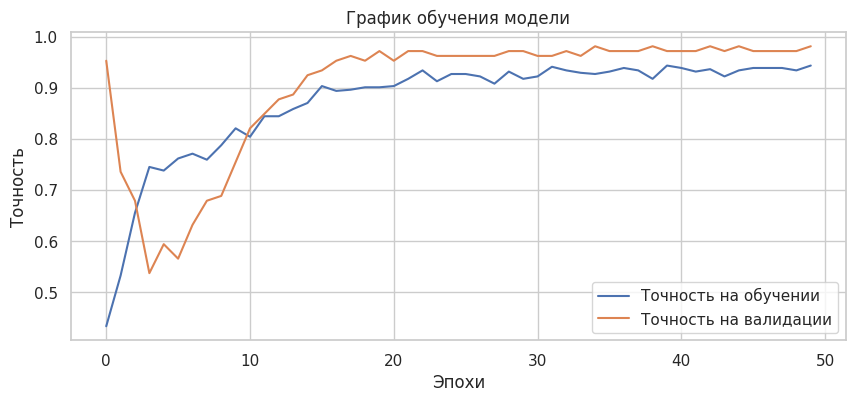

In [221]:
# 7. ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('График обучения модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

Сравнение результатов моделей

In [223]:
# Compare
print("Логистическая регрессия (LR):\n", classification_report(y_test, y_pred_lr_smote))
print("Дерево решений (DT):\n", classification_report(y_test, y_pred_dt_smote))
print("Наивный байесовский классификатор (BNB):\n", classification_report(y_test, y_pred_bnb_smote))
print("Метод опорных векторов (SVM):\n", classification_report(y_test, y_pred_svc_smote))
print("Метод k-ближайших соседей (KNN):\n", classification_report(y_test, y_pred_knn_smote))
print("Нейронная сеть (NN):\n", classification_report(y_test, y_pred_nn_smote))

Логистическая регрессия (LR):
               precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.97      0.85      0.90        66

    accuracy                           0.85        81
   macro avg       0.77      0.86      0.79        81
weighted avg       0.89      0.85      0.86        81

Дерево решений (DT):
               precision    recall  f1-score   support

           0       0.41      0.73      0.52        15
           1       0.93      0.76      0.83        66

    accuracy                           0.75        81
   macro avg       0.67      0.75      0.68        81
weighted avg       0.83      0.75      0.78        81

Наивный байесовский классификатор (BNB):
               precision    recall  f1-score   support

           0       0.26      0.60      0.36        15
           1       0.87      0.61      0.71        66

    accuracy                           0.60        81
   macro avg       0.56      0.60

**Обучение моделей после применения метода PCA**

In [114]:
from sklearn.decomposition import PCA
# Применение PCA
# Можно указать количество компонентов (например, n_components=5)
# или долю объясненной дисперсии (например, n_components=0.95)
pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\nРазмерность X_train после PCA:", X_train_pca.shape)
print("Размерность X_test после PCA:", X_test_pca.shape)
print("Доля объясненной дисперсии PCA:", pca.explained_variance_ratio_.sum())


Размерность X_train после PCA: (324, 6)
Размерность X_test после PCA: (81, 6)
Доля объясненной дисперсии PCA: 0.9819518617447522


Метод логарифмичсекой регрессии

In [273]:
# Создание и обучение модели логистической регрессии
model = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
model.fit(X_train_pca, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [274]:
# Прогнозирование на тестовой выборке
y_pred_lr_pca = model.predict(X_test_pca)
y_pred_proba_lr_pca = model.predict_proba(X_test_pca)[:, 1]

In [275]:
# Оценка качества модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_lr_pca)
print(f"Точность модели: {accuracy:.4f}")

Точность модели: 0.8395


In [276]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации:")
print(classification_report(y_test, y_pred_lr_pca))


Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        15
           1       0.86      0.95      0.91        66

    accuracy                           0.84        81
   macro avg       0.74      0.64      0.67        81
weighted avg       0.82      0.84      0.82        81



In [277]:
# Матрица ошибок
cm_lr_pca= confusion_matrix(y_test, y_pred_lr_pca)
print("\nМатрица ошибок:")
print(cm_lr_pca)


Матрица ошибок:
[[ 5 10]
 [ 3 63]]



ROC AUC: 0.7727


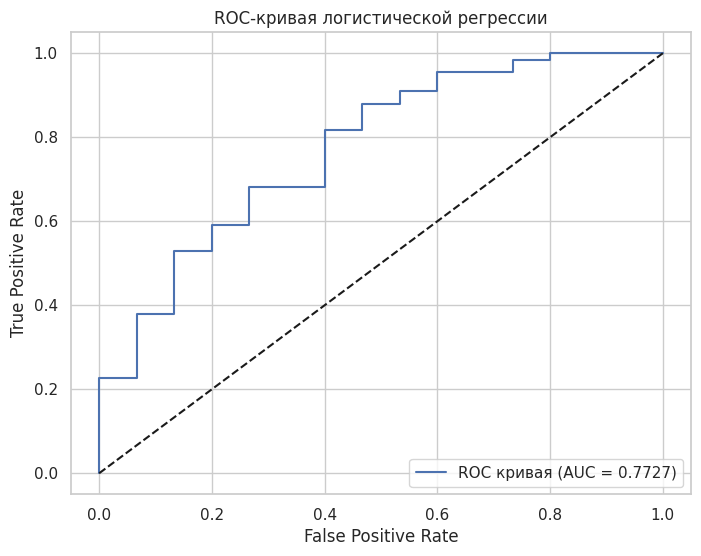

In [278]:
# ROC-кривая и значение AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_lr_pca)
print(f"\nROC AUC: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая логистической регрессии')
plt.legend(loc='lower right')
plt.show()

In [279]:
# Получение и анализ коэффициентов модели
# X_train_pca.shape[1] gives the number of components after PCA
coefficients = pd.DataFrame({
'Признак': [f'PC{i+1}' for i in range(X_train_pca.shape[1])],
'Коэффициент': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Коэффициент', ascending=False)
print("\nКоэффициенты модели:")
print(coefficients)


Коэффициенты модели:
  Признак  Коэффициент
3     PC4     0.639970
0     PC1     0.388195
1     PC2     0.332696
2     PC3    -0.277516
5     PC6    -0.740023
4     PC5    -1.033563


дерево решений

In [314]:
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение модели Decision Tree Classifier
model_dt_pca = DecisionTreeClassifier(random_state=42)
model_dt_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

In [317]:
# Прогнозирование на тестовой выборке
y_pred_dt_pca = model_dt_pca.predict(X_test_pca)
y_pred_proba_dt_pca = model_dt_pca.predict_proba(X_test_pca)[:, 1]

In [319]:
# Оценка качества модели
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print(f"Точность модели Дерево решений (DT): {accuracy_dt_pca:.4f}")

Точность модели Дерево решений (DT): 0.7037


In [320]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Дерево решений (DT)):")
print(classification_report(y_test, y_pred_dt_сpa))


Отчёт о классификации (Дерево решений (DT)):
              precision    recall  f1-score   support

           0       0.29      0.40      0.33        15
           1       0.85      0.77      0.81        66

    accuracy                           0.70        81
   macro avg       0.57      0.59      0.57        81
weighted avg       0.75      0.70      0.72        81



In [322]:
# Матрица ошибок
cm_dt_pca = confusion_matrix(y_test, y_pred_dt_pca)
print("\nМатрица ошибок (Дерево решений (DT)):")
print(cm_dt_pca)


Матрица ошибок (Дерево решений (DT)):
[[ 6  9]
 [15 51]]



ROC AUC (Дерево решений (DT)): 0.5864


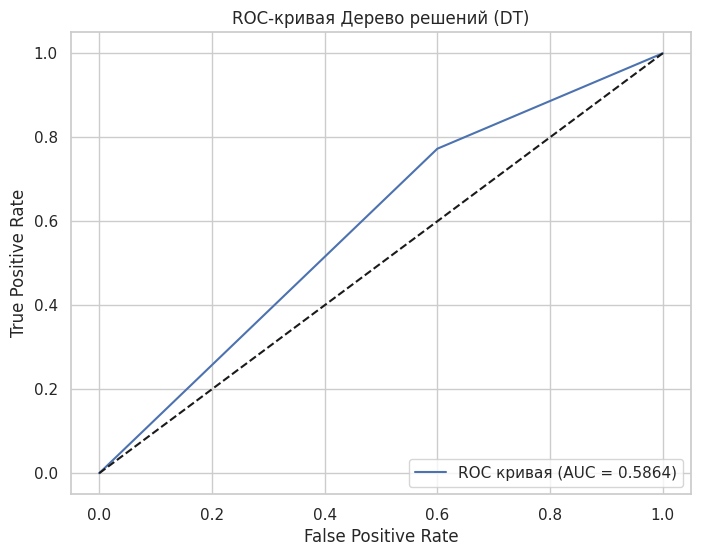

In [323]:
# ROC-кривая и значение AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt_pca)
print(f"\nROC AUC (Дерево решений (DT)): {roc_auc_dt:.4f}")

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC кривая (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Дерево решений (DT)')
plt.legend(loc='lower right')
plt.show()

Наивный байесовский классификатор Бернулли (BNB)

In [128]:
from sklearn.naive_bayes import BernoulliNB

In [288]:
# Создание и обучение модели Наивного Байеса Бернулли
model_bnb_pca = BernoulliNB()
model_bnb_pca.fit(X_train_pca, y_train)

BernoulliNB()

In [289]:
# Прогнозирование на тестовой выборке
y_pred_bnb_pca = model_bnb_pca.predict(X_test_pca)
y_pred_proba_bnb_pca = model_bnb_pca.predict_proba(X_test_pca)[:, 1]

In [290]:
# Оценка качества модели
accuracy_bnb_pca = accuracy_score(y_test, y_pred_bnb_pca)
print(f"Точность модели Наивного Байеса Бернулли: {accuracy_bnb_pca:.4f}")

Точность модели Наивного Байеса Бернулли: 0.8025


In [291]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Наивный Байес Бернулли):")
print(classification_report(y_test, y_pred_bnb_pca))


Отчёт о классификации (Наивный Байес Бернулли):
              precision    recall  f1-score   support

           0       0.40      0.13      0.20        15
           1       0.83      0.95      0.89        66

    accuracy                           0.80        81
   macro avg       0.61      0.54      0.54        81
weighted avg       0.75      0.80      0.76        81



In [292]:
# Матрица ошибок
cm_bnb_cpa = confusion_matrix(y_test, y_pred_bnb_pca)
print("\nМатрица ошибок (Наивный Байес Бернулли)):")
print(cm_bnb_cpa)


Матрица ошибок (Наивный Байес Бернулли)):
[[ 2 13]
 [ 3 63]]



ROC AUC (Наивный Байес Бернулли)): 0.7712


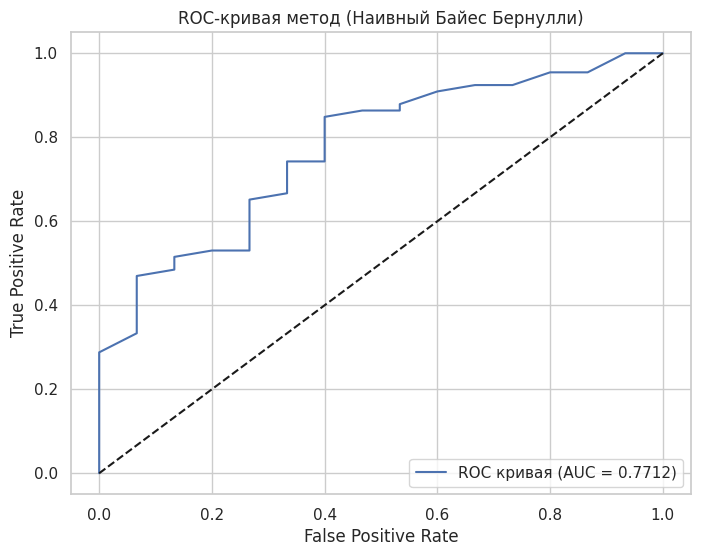

In [293]:
# ROC-кривая и значение AUC
roc_auc_bnb = roc_auc_score(y_test, y_pred_proba_bnb_pca)
print(f"\nROC AUC (Наивный Байес Бернулли)): {roc_auc_bnb:.4f}")

fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_pred_proba_bnb_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr_bnb, tpr_bnb, label=f'ROC кривая (AUC = {roc_auc_bnb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая метод (Наивный Байес Бернулли)')
plt.legend(loc='lower right')
plt.show()

Метод опорных векторов (SVM)

In [294]:
# Создание и обучение модели Метод опорных векторов (SVM)
model_svc_pca = SVC(probability=True, random_state=42)
model_svc_pca.fit(X_train_pca, y_train)

SVC(probability=True, random_state=42)

In [295]:
# Прогнозирование на тестовой выборке
y_pred_svc_pca = model_svc_pca.predict(X_test_pca)
y_pred_proba_svc_pca = model_svc_pca.predict_proba(X_test_pca)[:, 1]

In [296]:
# Оценка качества модели
accuracy_svc_pca = accuracy_score(y_test, y_pred_svc_pca)
print(f"Точность модели Метод опорных векторов (SVM): {accuracy_svc_pca:.4f}")

Точность модели Метод опорных векторов (SVM): 0.8395


In [297]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Метод опорных векторов (SVM)):")
print(classification_report(y_test, y_pred_svc_pca))


Отчёт о классификации (Метод опорных векторов (SVM)):
              precision    recall  f1-score   support

           0       0.75      0.20      0.32        15
           1       0.84      0.98      0.91        66

    accuracy                           0.84        81
   macro avg       0.80      0.59      0.61        81
weighted avg       0.83      0.84      0.80        81



In [298]:
# Матрица ошибок
cm_svc_cpa = confusion_matrix(y_test, y_pred_svc_pca)
print("\nМатрица ошибок (Метод опорных векторов (SVM)):")
print(cm_svc_cpa)


Матрица ошибок (Метод опорных векторов (SVM)):
[[ 3 12]
 [ 1 65]]



ROC AUC (Метод опорных векторов (SVM)): 0.8141


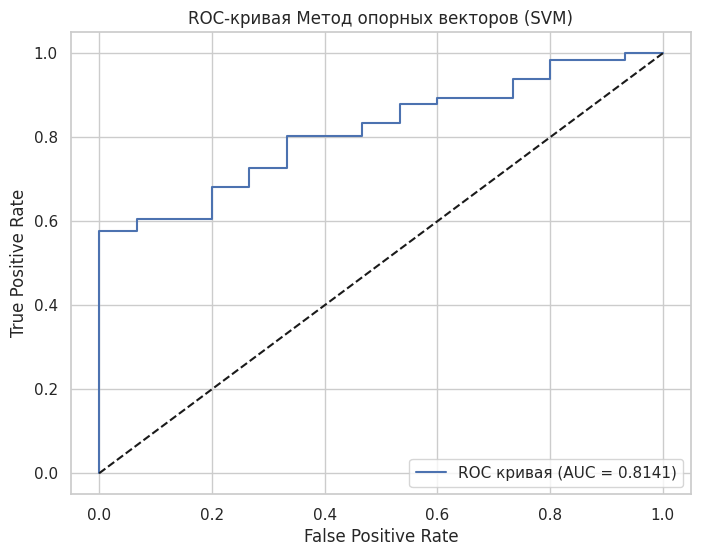

In [299]:
# ROC-кривая и значение AUC
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc_pca)
print(f"\nROC AUC (Метод опорных векторов (SVM)): {roc_auc_svc:.4f}")

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'ROC кривая (AUC = {roc_auc_svc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Метод опорных векторов (SVM)')
plt.legend(loc='lower right')
plt.show()

Метод k-ближайших соседей (KNN)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [300]:
# Создание и обучение модели K-ближайших соседей (KNN)
# Можно настроить количество соседей (n_neighbors) и метрику расстояния (metric)
model_knn_pca = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # Вы можете экспериментировать с n_neighbors
model_knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [301]:
# Прогнозирование на тестовой выборке
y_pred_knn_pca = model_knn_pca.predict(X_test_pca)
y_pred_proba_knn_pca = model_knn_pca.predict_proba(X_test_pca)[:, 1]

In [302]:
# Оценка качества модели
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
print(f"Точность модели метода k-ближайших соседей (KNN): {accuracy_knn:.4f}")

Точность модели метода k-ближайших соседей (KNN): 0.7531


In [303]:
# Детальный отчёт о качестве классификации
print("\nОтчёт о классификации (Метод k-ближайших соседей (KNN)):")
print(classification_report(y_test, y_pred_knn_pca))


Отчёт о классификации (Метод k-ближайших соседей (KNN)):
              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.84      0.97      0.90        66

    accuracy                           0.83        81
   macro avg       0.72      0.58      0.60        81
weighted avg       0.80      0.83      0.79        81



In [304]:
# Матрица ошибок
cm_knn_cpa = confusion_matrix(y_test, y_pred_knn_pca)
print("\nМатрица ошибок (Метод k-ближайших соседей (KNN)):")
print(cm_knn_cpa)


Матрица ошибок (Метод k-ближайших соседей (KNN)):
[[ 3 12]
 [ 2 64]]



ROC AUC (Метод k-ближайших соседей (KNN)): 0.7096


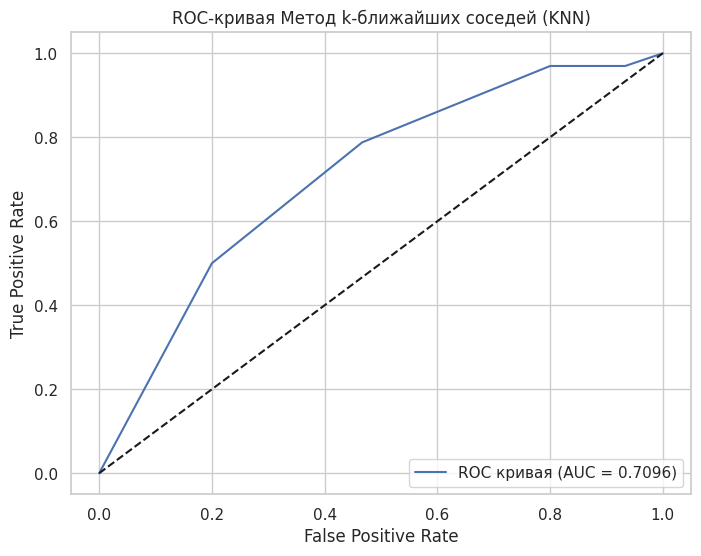

In [305]:
# ROC-кривая и значение AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn_pca)
print(f"\nROC AUC (Метод k-ближайших соседей (KNN)): {roc_auc_knn:.4f}")

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC кривая (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Метод k-ближайших соседей (KNN)')
plt.legend(loc='lower right')
plt.show()

СОЗДАНИЕ НЕЙРОННОЙ СЕТИ

In [306]:
# 4. СОЗДАНИЕ НЕЙРОННОЙ СЕТИ
model = models.Sequential()

# Входной слой + первый скрытый слой
# 16 нейронов, активация ReLU (стандарт для скрытых слоев)
model.add(Input(shape=(X_train_pca.shape[1],)))
model.add(layers.Dense(16, activation='relu'))

# Второй скрытый слой (для выявления более сложных зависимостей)
model.add(layers.Dense(8, activation='relu'))

# Слой Dropout (отключает 20% нейронов случайно, чтобы избежать переобучения)
model.add(layers.Dropout(0.2))

# Выходной слой
# 1 нейрон, активация Sigmoid (выдает вероятность от 0 до 1)
model.add(layers.Dense(1, activation='sigmoid'))

In [307]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Функция потерь для бинарной классификации
              metrics=['accuracy'])

In [308]:
# 5. ОБУЧЕНИЕ МОДЕЛИ
# epochs=50 - сколько раз модель пройдет через все данные
# batch_size=10 - порциями по 10 примеров
history = model.fit(X_train_pca, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1824 - loss: 1.2029 - val_accuracy: 0.1385 - val_loss: 1.0790
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2807 - loss: 0.9659 - val_accuracy: 0.1846 - val_loss: 0.9141
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3012 - loss: 0.8527 - val_accuracy: 0.3077 - val_loss: 0.8148
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4825 - loss: 0.7583 - val_accuracy: 0.4769 - val_loss: 0.7440
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4868 - loss: 0.7417 - val_accuracy: 0.5846 - val_loss: 0.6914
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6047 - loss: 0.6854 - val_accuracy: 0.6923 - val_loss: 0.6548
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7558 - loss: 0.6379 - val_accuracy: 0.7846 - val_loss: 0.6187
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7605 - loss: 0.6238 - val_accuracy: 0.8154 - val_loss

In [309]:
# 6. ОЦЕНКА РЕЗУЛЬТАТОВ
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"\n--- Результаты на тестовых данных ---")
print(f"Точность (Accuracy): {accuracy*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8751 - loss: 0.3604

--- Результаты на тестовых данных ---
Точность (Accuracy): 85.19%


In [310]:
# Детальный отчет
y_pred_prob_nn_pca = model.predict(X_test_pca)
y_pred_nn_pca = (y_pred_prob_nn_pca > 0.5).astype(int) # Перевод вероятности в классы 0 или 1

print("\n--- Отчет классификации ---")
print(classification_report(y_test, y_pred_nn_pca))



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

--- Отчет классификации ---
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.86      0.97      0.91        66

    accuracy                           0.85        81
   macro avg       0.79      0.65      0.68        81
weighted avg       0.84      0.85      0.83        81



In [311]:
# Матрица ошибок
cm_nn_cpa = confusion_matrix(y_test, y_pred_nn_pca)
print("\nМатрица ошибок (Метод k-ближайших соседей (KNN)):")
print(cm_nn_cpa)



Матрица ошибок (Метод k-ближайших соседей (KNN)):
[[ 5 10]
 [ 2 64]]


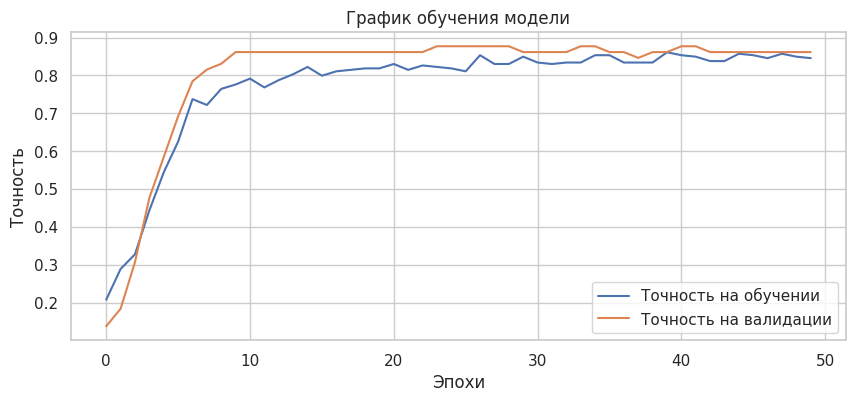

In [312]:
# 7. ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('График обучения модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [313]:
# Compare
print("Логистическая регрессия (LR):\n", classification_report(y_test, y_pred_lr_pca))
print("Дерево решений (DT):\n", classification_report(y_test, y_pred_dt_pca))
print("Наивный байесовский классификатор (BNB):\n", classification_report(y_test, y_pred_bnb_pca))
print("Метод опорных векторов (SVM):\n", classification_report(y_test, y_pred_svc_pca))
print("Метод k-ближайших соседей (KNN):\n", classification_report(y_test, y_pred_knn_pca))
print("Нейронная сеть (NN):\n", classification_report(y_test, y_pred_nn_pca))

Логистическая регрессия (LR):
               precision    recall  f1-score   support

           0       0.62      0.33      0.43        15
           1       0.86      0.95      0.91        66

    accuracy                           0.84        81
   macro avg       0.74      0.64      0.67        81
weighted avg       0.82      0.84      0.82        81



NameError: name 'y_pred_dt_pca' is not defined

In [324]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# 1. Создаем словарь моделей и метрик
models_results = {
    "Логистическая регрессия (LR)": y_pred_lr_original,
    "Дерево решений (DT)": y_pred_dt_original,
    "Наивный байесовский классификатор (BNB)": y_pred_bnb_original,
    "Метод опорных векторов (SVM)": y_pred_svc_original,
    "Метод k-ближайших соседей (KNN)": y_pred_knn_original,
    "Нейронная сеть (NN)": y_pred_nn_original,
    "Логистическая регрессия (LR) SMOTE": y_pred_lr_smote,
    "Дерево решений (DT) SMOTE": y_pred_dt_smote,
    "Наивный байесовский классификатор (BNB) SMOTE": y_pred_bnb_smote,
    "Метод опорных векторов (SVM) SMOTE": y_pred_svc_smote,
    "Метод k-ближайших соседей (KNN) SMOTE": y_pred_knn_smote,
    "Нейронная сеть (NN) SMOTE": y_pred_nn_smote,
    "Логистическая регрессия (LR) PCA": y_pred_lr_pca,
    "Дерево решений (DT) PCA": y_pred_dt_pca,
    "Наивный байесовский классификатор (BNB) PCA": y_pred_bnb_pca,
    "Метод опорных векторов (SVM) PCA": y_pred_svc_pca,
    "Метод k-ближайших соседей (KNN) PCA": y_pred_knn_pca,
    "Нейронная сеть (NN) PCA": y_pred_nn_pca
}

# 2. Собираем метрики в список
table_data = []

for name, y_pred_val in models_results.items():
    # Получаем precision, recall и f1 для взвешенного среднего (weighted avg)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_val, average='weighted')
    # Получаем точность (accuracy)
    acc = accuracy_score(y_test, y_pred_val)

    table_data.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-score": round(f1, 4),
        "Support": len(y_test)
    })

# 3. Создаем и выводим таблицу
df_metrics = pd.DataFrame(table_data)

# Сортируем по F1-score для наглядности
df_metrics = df_metrics.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

# Красивый вывод с подсветкой (в Colab/Jupyter)
display(df_metrics.style.background_gradient(cmap='Blues', subset=['F1-score', 'Accuracy']))

,Model,Accuracy,Precision,Recall,F1-score,Support
0,Нейронная сеть (NN) SMOTE,0.888900,0.886300,0.888900,0.887400,81
1,Логистическая регрессия (LR),0.901200,0.911900,0.901200,0.886100,81
2,Нейронная сеть (NN),0.901200,0.911900,0.901200,0.886100,81
3,Логистическая регрессия (LR) SMOTE,0.851900,0.891400,0.851900,0.862700,81
4,Нейронная сеть (NN) PCA,0.851900,0.837000,0.851900,0.829100,81
5,Метод опорных векторов (SVM),0.851900,0.845000,0.851900,0.820000,81
6,Логистическая регрессия (LR) PCA,0.839500,0.818900,0.839500,0.819100,81
7,Метод опорных векторов (SVM) SMOTE,0.790100,0.829900,0.790100,0.804100,81
8,Метод опорных векторов (SVM) PCA,0.839500,0.826700,0.839500,0.799200,81
9,Дерево решений (DT),0.777800,0.812700,0.777800,0.791000,81
